In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


dataframe = pd.read_excel('default_of_credit_card_clients.xls', header=1)


dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [2]:
class PrepareColumnAndIndex(BaseEstimator, TransformerMixin):
    def __init__(self, index_col='ID', new_column_names=None, categorical_columns=None):
        """
        Inicjalizacja transformera.
        
        Parameters:
        - index_col (str): Nazwa kolumny do ustawienia jako indeks.
        - new_column_names (dict): Słownik mapujący stare nazwy kolumn na nowe.
        - categorical_columns (list): Lista kolumn do konwersji na typ 'category'.
        """
        self.index_col = index_col
        self.new_column_names = new_column_names or {}
        self.categorical_columns = categorical_columns or []

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # tworzenie kopii, aby nie modyfikować oryginalnego dataframe
        df_transformed = X.copy()
        
        # ustawienie indeksu
        if self.index_col in df_transformed.columns:
            df_transformed.set_index(self.index_col, inplace=True)
        
        # zmiana nazw kolumn
        if self.new_column_names:
            df_transformed.rename(columns=self.new_column_names, inplace=True)
        
        # konwersja na kategorie -> zmienne kategoryczne
        for col in self.categorical_columns:
            if col in df_transformed.columns:
                df_transformed[col] = df_transformed[col].astype('category')
        
        return df_transformed

# definicja parametrów
## nazwy kolumn na bazie opisu zmiennych
new_columns = {
    'LIMIT_BAL': 'X1_LIMIT_BAL',
    'SEX': 'X2_SEX',
    'EDUCATION': 'X3_EDUCATION',
    'MARRIAGE': 'X4_MARRIAGE',
    'AGE': 'X5_AGE',
    'PAY_0': 'X6_PAY_SEP',
    'PAY_2': 'X7_PAY_AUG',
    'PAY_3': 'X8_PAY_JUL',
    'PAY_4': 'X9_PAY_JUN',
    'PAY_5': 'X10_PAY_MAY',
    'PAY_6': 'X11_PAY_APR',
    'BILL_AMT1': 'X12_BILL_AMT_SEP',
    'BILL_AMT2': 'X13_BILL_AMT_AUG',
    'BILL_AMT3': 'X14_BILL_AMT_JUL',
    'BILL_AMT4': 'X15_BILL_AMT_JUN',
    'BILL_AMT5': 'X16_BILL_AMT_MAY',
    'BILL_AMT6': 'X17_BILL_AMT_APR',
    'PAY_AMT1': 'X18_PAY_AMT_SEP',
    'PAY_AMT2': 'X19_PAY_AMT_AUG',
    'PAY_AMT3': 'X20_PAY_AMT_JUL',
    'PAY_AMT4': 'X21_PAY_AMT_JUN',
    'PAY_AMT5': 'X22_PAY_AMT_MAY',
    'PAY_AMT6': 'X23_PAY_AMT_APR',
    'default payment next month': 'Y_DEFAULT_PAYMENT'
}

## zmienne kategoryczne
categorical_columns = ['X2_SEX', 'X3_EDUCATION', 'X4_MARRIAGE', 
                      'X6_PAY_SEP', 'X7_PAY_AUG', 'X8_PAY_JUL', 
                      'X9_PAY_JUN', 'X10_PAY_MAY', 'X11_PAY_APR', 
                      'Y_DEFAULT_PAYMENT']

## utworzenie pipeline
steps = [
    ('prepare_column_and_index', PrepareColumnAndIndex(
        index_col='ID',
        new_column_names=new_columns,
        categorical_columns=categorical_columns
    ))
]
data_preparation_pipeline = Pipeline(steps=steps)

## transformacja
dataframe_prepared = data_preparation_pipeline.fit_transform(dataframe)


dataframe_prepared

,X1_LIMIT_BAL,X2_SEX,X3_EDUCATION,X4_MARRIAGE,X5_AGE,X6_PAY_SEP,X7_PAY_AUG,X8_PAY_JUL,X9_PAY_JUN,X10_PAY_MAY,...,X15_BILL_AMT_JUN,X16_BILL_AMT_MAY,X17_BILL_AMT_APR,X18_PAY_AMT_SEP,X19_PAY_AMT_AUG,X20_PAY_AMT_JUL,X21_PAY_AMT_JUN,X22_PAY_AMT_MAY,X23_PAY_AMT_APR,Y_DEFAULT_PAYMENT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [3]:
print(dataframe_prepared.dtypes)

X1_LIMIT_BAL            int64
X2_SEX               category
X3_EDUCATION         category
X4_MARRIAGE          category
X5_AGE                  int64
X6_PAY_SEP           category
X7_PAY_AUG           category
X8_PAY_JUL           category
X9_PAY_JUN           category
X10_PAY_MAY          category
X11_PAY_APR          category
X12_BILL_AMT_SEP        int64
X13_BILL_AMT_AUG        int64
X14_BILL_AMT_JUL        int64
X15_BILL_AMT_JUN        int64
X16_BILL_AMT_MAY        int64
X17_BILL_AMT_APR        int64
X18_PAY_AMT_SEP         int64
X19_PAY_AMT_AUG         int64
X20_PAY_AMT_JUL         int64
X21_PAY_AMT_JUN         int64
X22_PAY_AMT_MAY         int64
X23_PAY_AMT_APR         int64
Y_DEFAULT_PAYMENT    category
dtype: object


In [4]:
## sprawdzenie wartości brakujących
print(dataframe_prepared.isnull().sum())

X1_LIMIT_BAL         0
X2_SEX               0
X3_EDUCATION         0
X4_MARRIAGE          0
X5_AGE               0
X6_PAY_SEP           0
X7_PAY_AUG           0
X8_PAY_JUL           0
X9_PAY_JUN           0
X10_PAY_MAY          0
X11_PAY_APR          0
X12_BILL_AMT_SEP     0
X13_BILL_AMT_AUG     0
X14_BILL_AMT_JUL     0
X15_BILL_AMT_JUN     0
X16_BILL_AMT_MAY     0
X17_BILL_AMT_APR     0
X18_PAY_AMT_SEP      0
X19_PAY_AMT_AUG      0
X20_PAY_AMT_JUL      0
X21_PAY_AMT_JUN      0
X22_PAY_AMT_MAY      0
X23_PAY_AMT_APR      0
Y_DEFAULT_PAYMENT    0
dtype: int64


In [5]:
## unikalne wartości w każdej kolumnie kategorycznej
for col in categorical_columns:
    print(f"{col}: {dataframe_prepared[col].cat.categories.tolist()}")

X2_SEX: [1, 2]
X3_EDUCATION: [0, 1, 2, 3, 4, 5, 6]
X4_MARRIAGE: [0, 1, 2, 3]
X6_PAY_SEP: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
X7_PAY_AUG: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
X8_PAY_JUL: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
X9_PAY_JUN: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
X10_PAY_MAY: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
X11_PAY_APR: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
Y_DEFAULT_PAYMENT: [0, 1]


In [6]:
## expected_ranges  --> zmienne udokumentowane (obecne w opisie)
expected_ranges = {
    'X2_SEX': [1, 2],
    'X3_EDUCATION': [1, 2, 3, 4],
    'X4_MARRIAGE': [1, 2, 3],
    'X6_PAY_SEP': [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'X7_PAY_AUG': [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'X8_PAY_JUL': [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'X9_PAY_JUN': [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'X10_PAY_MAY': [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'X11_PAY_APR': [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Y_DEFAULT_PAYMENT': [0, 1]
}

## weryfikacja wartosci spoza zakresow z opisu zmiennych
for col in categorical_columns:
    invalid_mask = ~dataframe_prepared[col].isin(expected_ranges[col])
    
    invalid_rows = dataframe_prepared[invalid_mask]

    if not invalid_rows.empty:
        unexpected_values = invalid_rows[col].unique().tolist()
        print(f"{col} zawiera nieoczekiwane wartości: {unexpected_values}")
    else:
        print(f"{col}: Wszystkie wartości są w oczekiwanym zakresie.")

X2_SEX: Wszystkie wartości są w oczekiwanym zakresie.
X3_EDUCATION zawiera nieoczekiwane wartości: [5, 6, 0]
X4_MARRIAGE zawiera nieoczekiwane wartości: [0]
X6_PAY_SEP zawiera nieoczekiwane wartości: [0, -2]
X7_PAY_AUG zawiera nieoczekiwane wartości: [0, -2]
X8_PAY_JUL zawiera nieoczekiwane wartości: [0, -2]
X9_PAY_JUN zawiera nieoczekiwane wartości: [0, -2]
X10_PAY_MAY zawiera nieoczekiwane wartości: [-2, 0]
X11_PAY_APR zawiera nieoczekiwane wartości: [-2, 0]
Y_DEFAULT_PAYMENT: Wszystkie wartości są w oczekiwanym zakresie.


In [7]:
## rozkład wartości

for col in categorical_columns:
    print(f"\n{col}:")
    print(dataframe_prepared[col].value_counts())


X2_SEX:
X2_SEX
2    18112
1    11888
Name: count, dtype: int64

X3_EDUCATION:
X3_EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

X4_MARRIAGE:
X4_MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

X6_PAY_SEP:
X6_PAY_SEP
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

X7_PAY_AUG:
X7_PAY_AUG
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64

X8_PAY_JUL:
X8_PAY_JUL
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: count, dtype: int64

X9_PAY_JUN:
X9_PAY_JUN
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: c


X3_EDUCATION = 0:
Y_DEFAULT_PAYMENT
0    1.0
1    0.0
Name: proportion, dtype: float64

X3_EDUCATION = 1:
Y_DEFAULT_PAYMENT
0    0.807652
1    0.192348
Name: proportion, dtype: float64

X3_EDUCATION = 2:
Y_DEFAULT_PAYMENT
0    0.762651
1    0.237349
Name: proportion, dtype: float64

X3_EDUCATION = 3:
Y_DEFAULT_PAYMENT
0    0.748424
1    0.251576
Name: proportion, dtype: float64

X3_EDUCATION = 4:
Y_DEFAULT_PAYMENT
0    0.943089
1    0.056911
Name: proportion, dtype: float64

X3_EDUCATION = 5:
Y_DEFAULT_PAYMENT
0    0.935714
1    0.064286
Name: proportion, dtype: float64

X3_EDUCATION = 6:
Y_DEFAULT_PAYMENT
0    0.843137
1    0.156863
Name: proportion, dtype: float64


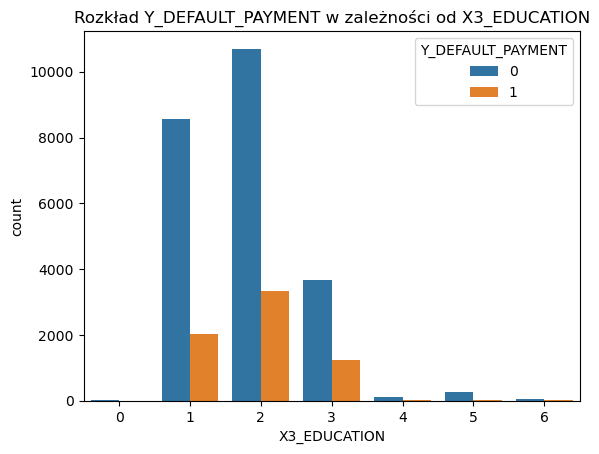


X3_EDUCATION = 0:
        X1_LIMIT_BAL     X5_AGE
count      14.000000  14.000000
mean   217142.857143  38.857143
std     86596.195638   7.241516
min     50000.000000  28.000000
25%    170000.000000  35.000000
50%    215000.000000  38.500000
75%    265000.000000  43.750000
max    360000.000000  53.000000

X3_EDUCATION = 1:
        X1_LIMIT_BAL        X5_AGE
count    10585.00000  10585.000000
mean    212956.06991     34.231838
std     135474.93673      8.270266
min      10000.00000     21.000000
25%     100000.00000     28.000000
50%     200000.00000     32.000000
75%     300000.00000     39.000000
max    1000000.00000     79.000000

X3_EDUCATION = 2:
        X1_LIMIT_BAL        X5_AGE
count   14030.000000  14030.000000
mean   147062.437634     34.722096
std    120672.282033      8.893848
min     10000.000000     21.000000
25%     50000.000000     27.000000
50%    110000.000000     33.000000
75%    210000.000000     41.000000
max    800000.000000     75.000000

X3_EDUCATION = 3:
      

In [8]:
## rozkład Y_DEFAULT_PAYMENT dla każdej kategorii w X3_EDUCATION
for category in dataframe_prepared['X3_EDUCATION'].cat.categories:
    subset = dataframe_prepared[dataframe_prepared['X3_EDUCATION'] == category]
    default_rate = subset['Y_DEFAULT_PAYMENT'].value_counts(normalize=True)
    print(f"\nX3_EDUCATION = {category}:")
    print(default_rate)

## wizualizacja zależności X3_EDUCATION i Y_DEFAULT_PAYMENT
sns.countplot(x='X3_EDUCATION', hue='Y_DEFAULT_PAYMENT', data=dataframe_prepared)
plt.title("Rozkład Y_DEFAULT_PAYMENT w zależności od X3_EDUCATION")
plt.show()

## statystyki innych zmiennych (np. X1_LIMIT_BAL, X5_AGE) dla kategorii X3_EDUCATION
for category in dataframe_prepared['X3_EDUCATION'].cat.categories:
    subset = dataframe_prepared[dataframe_prepared['X3_EDUCATION'] == category]
    print(f"\nX3_EDUCATION = {category}:")
    print(subset[['X1_LIMIT_BAL', 'X5_AGE']].describe())

In [9]:
"""

na podstawie danych i obserwacji, że kategorie 4 i 5 mają podobny rozkład Y_DEFAULT_PAYMENT i statystyki X1_LIMIT_BAL, X5_AGE, 
a kategorie 0 i 6 są zbyt rzadkie, by uzasadniać ich pozostawienie jako oddzielne kategorie
zamieniamy nieudokumentowne (nie ma ich w opisie) kategorie 0, 5, 6 na kategorie 4 = others w X3_EDUCATION

"""


class AdjustX3EducationCategories(BaseEstimator, TransformerMixin):
    def __init__(self, target_column='X3_EDUCATION', categories_to_replace=[0, 5, 6], replacement_category=4):
        """
        Inicjalizacja transformera do zmiany kategorii w X3_EDUCATION.
        
        Parameters:
        - target_column (str): Nazwa kolumny do przetworzenia (domyślnie 'X3_EDUCATION').
        - categories_to_replace (list): Lista kategorii do zastąpienia (domyślnie [0, 5, 6]).
        - replacement_category (int): Kategoria zastępująca (domyślnie 4).
        """
        self.target_column = target_column
        self.categories_to_replace = categories_to_replace
        self.replacement_category = replacement_category

    def fit(self, X, y=None):
        ## sprawdzamy, czy kolumna istnieje
        if self.target_column not in X.columns:
            raise ValueError(f"Kolumna {self.target_column} nie istnieje w danych.")
        return self

    def transform(self, X, y=None):
        ## tworzenie kopii, aby nie modyfikować oryginalnych danych
        df_transformed = X.copy()
        
        ## zamiana kategorii
        if self.target_column in df_transformed.columns:
            mask = df_transformed[self.target_column].isin(self.categories_to_replace)
            df_transformed.loc[mask, self.target_column] = self.replacement_category
        
        ## konwersja na kategorie i usunięcie nieużywanych
        if self.target_column in df_transformed.columns:
            df_transformed[self.target_column] = df_transformed[self.target_column].astype('category')
            df_transformed[self.target_column] = df_transformed[self.target_column].cat.remove_unused_categories()
        
        return df_transformed


## aktualizacja pipeline
steps = [
    ('prepare_column_and_index', PrepareColumnAndIndex(
        index_col='ID',
        new_column_names=new_columns,
        categorical_columns=categorical_columns
    )),
    ('adjust_x3_education_categories', AdjustX3EducationCategories(
        target_column='X3_EDUCATION',
        categories_to_replace=[0, 5, 6],
        replacement_category=4
    ))
]
data_preparation_pipeline = Pipeline(steps=steps)


## transformacja
dataframe_prepared = data_preparation_pipeline.fit_transform(dataframe)


print(dataframe_prepared.dtypes)

X1_LIMIT_BAL            int64
X2_SEX               category
X3_EDUCATION         category
X4_MARRIAGE          category
X5_AGE                  int64
X6_PAY_SEP           category
X7_PAY_AUG           category
X8_PAY_JUL           category
X9_PAY_JUN           category
X10_PAY_MAY          category
X11_PAY_APR          category
X12_BILL_AMT_SEP        int64
X13_BILL_AMT_AUG        int64
X14_BILL_AMT_JUL        int64
X15_BILL_AMT_JUN        int64
X16_BILL_AMT_MAY        int64
X17_BILL_AMT_APR        int64
X18_PAY_AMT_SEP         int64
X19_PAY_AMT_AUG         int64
X20_PAY_AMT_JUL         int64
X21_PAY_AMT_JUN         int64
X22_PAY_AMT_MAY         int64
X23_PAY_AMT_APR         int64
Y_DEFAULT_PAYMENT    category
dtype: object


In [10]:
print(dataframe_prepared['X3_EDUCATION'].value_counts())

print("\nRozkład Y_DEFAULT_PAYMENT dla połączonej kategorii 4:")
subset = dataframe_prepared[dataframe_prepared['X3_EDUCATION'] == 4]
print(subset['Y_DEFAULT_PAYMENT'].value_counts(normalize=True))

X3_EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

Rozkład Y_DEFAULT_PAYMENT dla połączonej kategorii 4:
Y_DEFAULT_PAYMENT
0    0.929487
1    0.070513
Name: proportion, dtype: float64



X4_MARRIAGE = 0:
Y_DEFAULT_PAYMENT
0    0.907407
1    0.092593
Name: proportion, dtype: float64

X4_MARRIAGE = 1:
Y_DEFAULT_PAYMENT
0    0.765283
1    0.234717
Name: proportion, dtype: float64

X4_MARRIAGE = 2:
Y_DEFAULT_PAYMENT
0    0.790717
1    0.209283
Name: proportion, dtype: float64

X4_MARRIAGE = 3:
Y_DEFAULT_PAYMENT
0    0.739938
1    0.260062
Name: proportion, dtype: float64


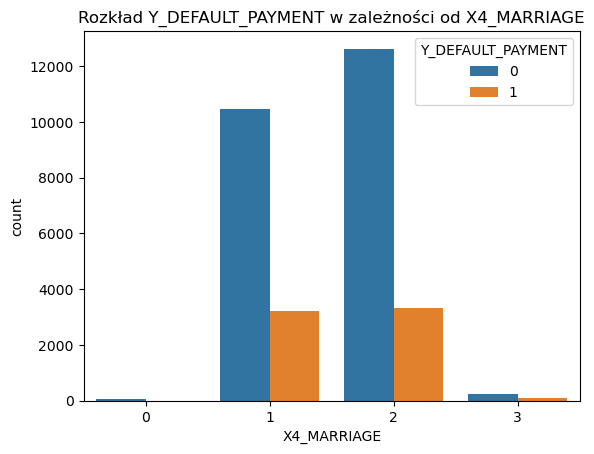


X4_MARRIAGE = 0:
        X1_LIMIT_BAL     X5_AGE
count      54.000000  54.000000
mean   132962.962963  37.814815
std     84331.547615   8.702795
min     10000.000000  23.000000
25%     70000.000000  31.000000
50%    115000.000000  37.000000
75%    200000.000000  45.000000
max    360000.000000  56.000000

X4_MARRIAGE = 1:
         X1_LIMIT_BAL        X5_AGE
count    13659.000000  13659.000000
mean    182200.893184     40.016692
std     133382.262668      8.720326
min      10000.000000     21.000000
25%      70000.000000     34.000000
50%     160000.000000     39.000000
75%     260000.000000     46.000000
max    1000000.000000     79.000000

X4_MARRIAGE = 2:
        X1_LIMIT_BAL        X5_AGE
count   15964.000000  15964.000000
mean   156413.660737     31.452706
std    125673.426316      7.592002
min     10000.000000     21.000000
25%     50000.000000     26.000000
50%    130000.000000     29.000000
75%    220000.000000     35.000000
max    800000.000000     70.000000

X4_MARRIAGE = 3:
 

In [11]:
## rozkład Y_DEFAULT_PAYMENT dla każdej kategorii w X4_MARRIAGE
for category in dataframe_prepared['X4_MARRIAGE'].cat.categories:
    subset = dataframe_prepared[dataframe_prepared['X4_MARRIAGE'] == category]
    default_rate = subset['Y_DEFAULT_PAYMENT'].value_counts(normalize=True)
    print(f"\nX4_MARRIAGE = {category}:")
    print(default_rate)

## wizualizacja zależności X4_MARRIAGE i Y_DEFAULT_PAYMENT
sns.countplot(x='X4_MARRIAGE', hue='Y_DEFAULT_PAYMENT', data=dataframe_prepared)
plt.title("Rozkład Y_DEFAULT_PAYMENT w zależności od X4_MARRIAGE")
plt.show()

## statystyki innych zmiennych (np. X1_LIMIT_BAL, X5_AGE) dla kategorii X4_MARRIAGE
for category in dataframe_prepared['X4_MARRIAGE'].cat.categories:
    subset = dataframe_prepared[dataframe_prepared['X4_MARRIAGE'] == category]
    print(f"\nX4_MARRIAGE = {category}:")
    print(subset[['X1_LIMIT_BAL', 'X5_AGE']].describe())

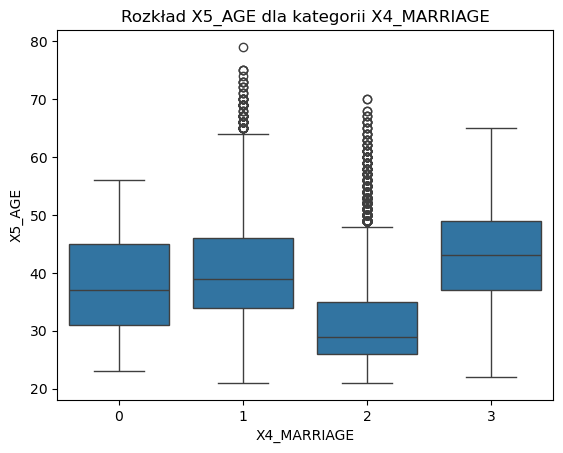

count    54.000000
mean     37.814815
std       8.702795
min      23.000000
25%      31.000000
50%      37.000000
75%      45.000000
max      56.000000
Name: X5_AGE, dtype: float64


In [12]:
## wizualizacja rozkładu X5_AGE dla każdej kategorii X4_MARRIAGE
sns.boxplot(x='X4_MARRIAGE', y='X5_AGE', data=dataframe_prepared)
plt.title("Rozkład X5_AGE dla kategorii X4_MARRIAGE")
plt.show()

## statystyki X5_AGE dla kategorii 0 (X4_MARRIAGE)
print(dataframe_prepared[dataframe_prepared['X4_MARRIAGE'] == 0]['X5_AGE'].describe())

In [13]:
"""

decyzja odnosnie nieudokumentowanej kategorii 0 dla cechy X4_MARRIAGE --> Kategoria 0 w X4_MARRIAGE została przypisana 
do 1 lub 2 na podstawie progu wieku 35 lat (age_threshold = 35); 
wykorzystuje zależności w danych (wiek vs. status cywilny) 
i minimalizuje szum w porównaniu do arbitralnego przypisania do kategorii 3 
(Ochrona kategorii 3 ktora ma tylko 323 obserwacje 
i wyższy odsetek defaultów (26.01%) i inny profil demograficzny niż kat. 0); 
zwiększenie liczby obserwacji w 1 i 2 (o 34 i 20) jest proporcjonalne do ich liczebności (13,659 i 15,964),
więc nie zaburza ogólnego rozkładu

"""

## propozycja imputacji na podstawie wieku
### jeśli wiek < 35, przypisz 2 (single) i jeśli ≥ 35, przypisz 1 (married)
#### age_threshold = 35  --> na podstawie mediany dla kategorii 2 (29) i 1 (39) oraz Q3 (75%) dla kat. 2 (single)

class AdjustX4MarriageCategories(BaseEstimator, TransformerMixin):
    def __init__(self, marriage_column='X4_MARRIAGE', age_column='X5_AGE', age_threshold=35):
        """
        Inicjalizacja transformera do zmiany kategorii w X4_MARRIAGE na podstawie wieku.
        
        Parameters:
        - marriage_column (str): Nazwa kolumny z statusem cywilnym (domyślnie 'X4_MARRIAGE').
        - age_column (str): Nazwa kolumny z wiekiem (domyślnie 'X5_AGE').
        - age_threshold (int): Próg wieku do przypisania kategorii (domyślnie 35).
        """
        self.marriage_column = marriage_column
        self.age_column = age_column
        self.age_threshold = age_threshold

    def fit(self, X, y=None):
        # sprawdzamy, czy kolumny istnieją
        if self.marriage_column not in X.columns or self.age_column not in X.columns:
            raise ValueError("Brak wymaganych kolumn w danych.")
        return self

    def transform(self, X, y=None):
        # tworzenie kopii, aby nie modyfikować oryginalnych danych
        df_transformed = X.copy()
        
        # przypisanie kategorii 0 na podstawie wieku
        if self.marriage_column in df_transformed.columns and self.age_column in df_transformed.columns:
            mask_zero = df_transformed[self.marriage_column] == 0
            df_transformed.loc[mask_zero & (df_transformed[self.age_column] < self.age_threshold), self.marriage_column] = 2
            df_transformed.loc[mask_zero & (df_transformed[self.age_column] >= self.age_threshold), self.marriage_column] = 1
        
        # konwersja na kategorie i usunięcie nieużywanych
        if self.marriage_column in df_transformed.columns:
            df_transformed[self.marriage_column] = df_transformed[self.marriage_column].astype('category')
            df_transformed[self.marriage_column] = df_transformed[self.marriage_column].cat.remove_unused_categories()
        
        return df_transformed


## aktualizacja pipeline
steps = [
    ('prepare_column_and_index', PrepareColumnAndIndex(
        index_col='ID',
        new_column_names=new_columns,
        categorical_columns=categorical_columns
    )),
    ('adjust_x3_education_categories', AdjustX3EducationCategories(
        target_column='X3_EDUCATION',
        categories_to_replace=[0, 5, 6],
        replacement_category=4
    )),
    ('adjust_x4_marriage_categories', AdjustX4MarriageCategories(
        marriage_column='X4_MARRIAGE',
        age_column='X5_AGE',
        age_threshold=35
    ))
]
data_preparation_pipeline = Pipeline(steps=steps)


## transformacja
dataframe_prepared = data_preparation_pipeline.fit_transform(dataframe)


print(dataframe_prepared.dtypes)

X1_LIMIT_BAL            int64
X2_SEX               category
X3_EDUCATION         category
X4_MARRIAGE          category
X5_AGE                  int64
X6_PAY_SEP           category
X7_PAY_AUG           category
X8_PAY_JUL           category
X9_PAY_JUN           category
X10_PAY_MAY          category
X11_PAY_APR          category
X12_BILL_AMT_SEP        int64
X13_BILL_AMT_AUG        int64
X14_BILL_AMT_JUL        int64
X15_BILL_AMT_JUN        int64
X16_BILL_AMT_MAY        int64
X17_BILL_AMT_APR        int64
X18_PAY_AMT_SEP         int64
X19_PAY_AMT_AUG         int64
X20_PAY_AMT_JUL         int64
X21_PAY_AMT_JUN         int64
X22_PAY_AMT_MAY         int64
X23_PAY_AMT_APR         int64
Y_DEFAULT_PAYMENT    category
dtype: object


In [14]:
# sprawdzenie nowego rozkładu X4_MARRIAGE po imputacji na podstawie wieku
print(dataframe_prepared['X4_MARRIAGE'].value_counts())

## sprawdzenie nowego rozkładu Y_DEFAULT_PAYMENT dla kategorii 1 i 2 po imputacji na podstawie wieku
for cat in [1, 2]:
    subset = dataframe_prepared[dataframe_prepared['X4_MARRIAGE'] == cat]
    print(f"\nX4_MARRIAGE = {cat}:")
    print(subset['Y_DEFAULT_PAYMENT'].value_counts(normalize=True))

X4_MARRIAGE
2    15984
1    13693
3      323
Name: count, dtype: int64

X4_MARRIAGE = 1:
Y_DEFAULT_PAYMENT
0    0.765647
1    0.234353
Name: proportion, dtype: float64

X4_MARRIAGE = 2:
Y_DEFAULT_PAYMENT
0    0.790853
1    0.209147
Name: proportion, dtype: float64


In [15]:
## lista zmiennych płatności
pay_columns = ['X6_PAY_SEP', 'X7_PAY_AUG', 'X8_PAY_JUL', 'X9_PAY_JUN', 'X10_PAY_MAY', 'X11_PAY_APR']


## rozkład Y_DEFAULT_PAYMENT dla kategorii -2 i 0 (nieudokumentowanych w opisie - błędy) oraz udokumentowanej -1
print("Rozkład Y_DEFAULT_PAYMENT dla kategorii nieudokumentowanych -2 i 0 oraz udokumentowanej kat. -1:")
for col in pay_columns:
    print(f"\n{col}:")
    for category in [-2, -1, 0]:
        subset = dataframe_prepared[dataframe_prepared[col] == category]
        if not subset.empty:
            print(f"  Kategoria {category}:")
            print(subset['Y_DEFAULT_PAYMENT'].value_counts(normalize=True))

Rozkład Y_DEFAULT_PAYMENT dla kategorii nieudokumentowanych -2 i 0 oraz udokumentowanej kat. -1:

X6_PAY_SEP:
  Kategoria -2:
Y_DEFAULT_PAYMENT
0    0.867706
1    0.132294
Name: proportion, dtype: float64
  Kategoria -1:
Y_DEFAULT_PAYMENT
0    0.832219
1    0.167781
Name: proportion, dtype: float64
  Kategoria 0:
Y_DEFAULT_PAYMENT
0    0.871887
1    0.128113
Name: proportion, dtype: float64

X7_PAY_AUG:
  Kategoria -2:
Y_DEFAULT_PAYMENT
0    0.817292
1    0.182708
Name: proportion, dtype: float64
  Kategoria -1:
Y_DEFAULT_PAYMENT
0    0.840331
1    0.159669
Name: proportion, dtype: float64
  Kategoria 0:
Y_DEFAULT_PAYMENT
0    0.840877
1    0.159123
Name: proportion, dtype: float64

X8_PAY_JUL:
  Kategoria -2:
Y_DEFAULT_PAYMENT
0    0.814688
1    0.185312
Name: proportion, dtype: float64
  Kategoria -1:
Y_DEFAULT_PAYMENT
0    0.844055
1    0.155945
Name: proportion, dtype: float64
  Kategoria 0:
Y_DEFAULT_PAYMENT
0    0.825488
1    0.174512
Name: proportion, dtype: float64

X9_PAY_JUN:


Statystyki dla X6_PAY_SEP (kategorie -2 i 0):

  Kategoria -2:
       X12_BILL_AMT_SEP  X18_PAY_AMT_SEP   X1_LIMIT_BAL       X5_AGE
count       2759.000000      2759.000000    2759.000000  2759.000000
mean        8793.052555      6477.920261  250391.446176    36.969192
std        28224.565390     20877.338447  126986.003063     8.619976
min       -15308.000000         0.000000   10000.000000    21.000000
25%            0.000000         0.000000  160000.000000    30.000000
50%         1179.000000      1131.000000  230000.000000    36.000000
75%         5819.000000      5000.000000  340000.000000    42.000000
max       478030.000000    368199.000000  800000.000000    73.000000

  Kategoria 0:
       X12_BILL_AMT_SEP  X18_PAY_AMT_SEP    X1_LIMIT_BAL        X5_AGE
count      14737.000000     14737.000000    14737.000000  14737.000000
mean       78417.889462      6082.560019   154265.025446     34.976250
std        82054.920294     14132.201296   126832.537271      9.283228
min          26

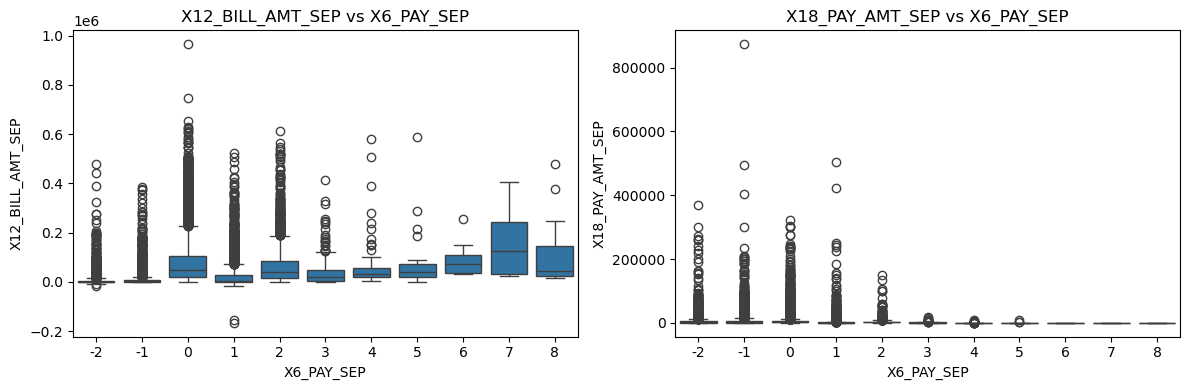

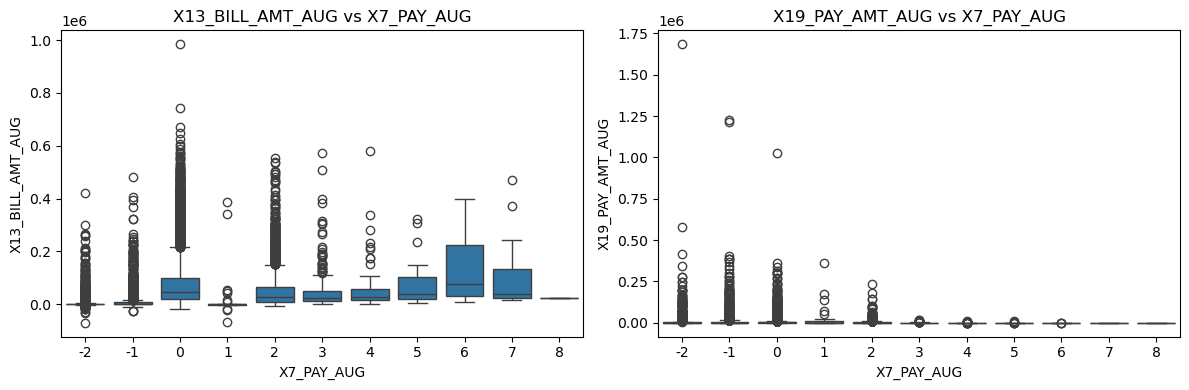

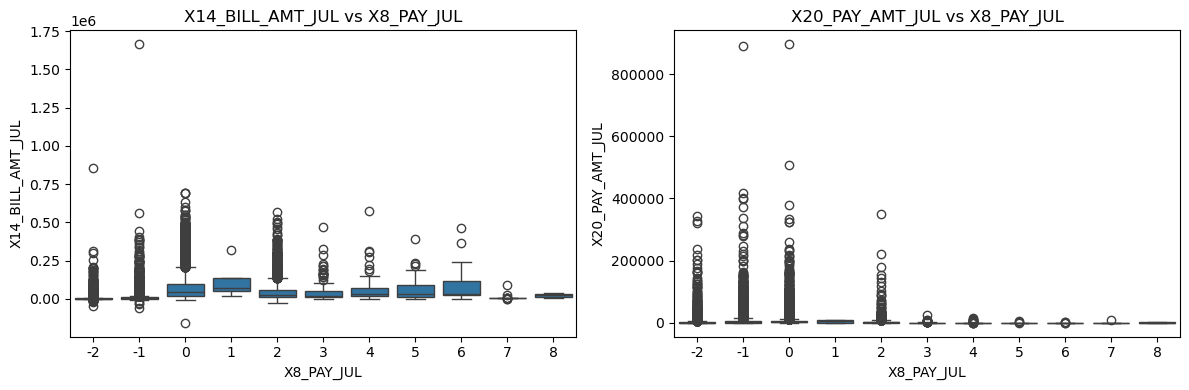

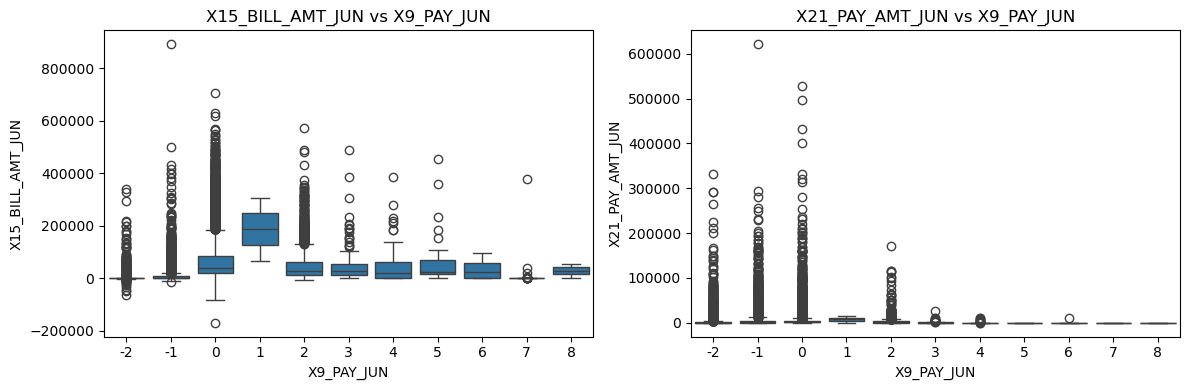

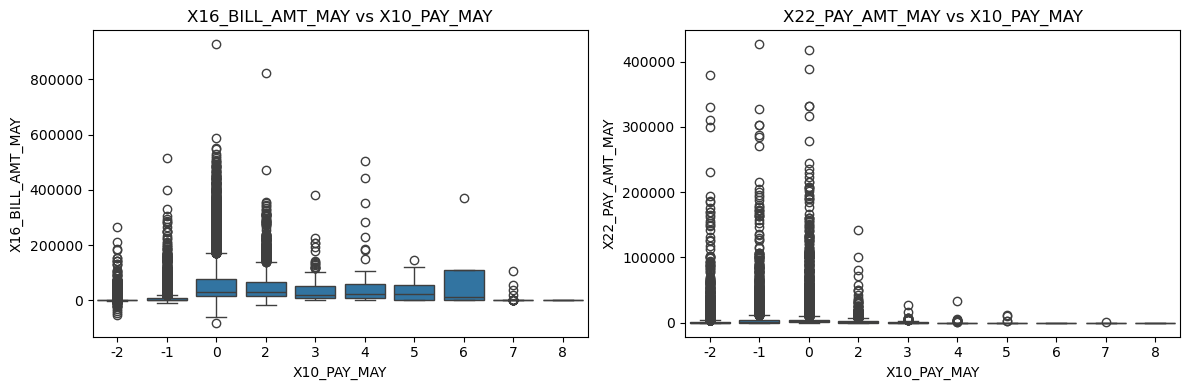

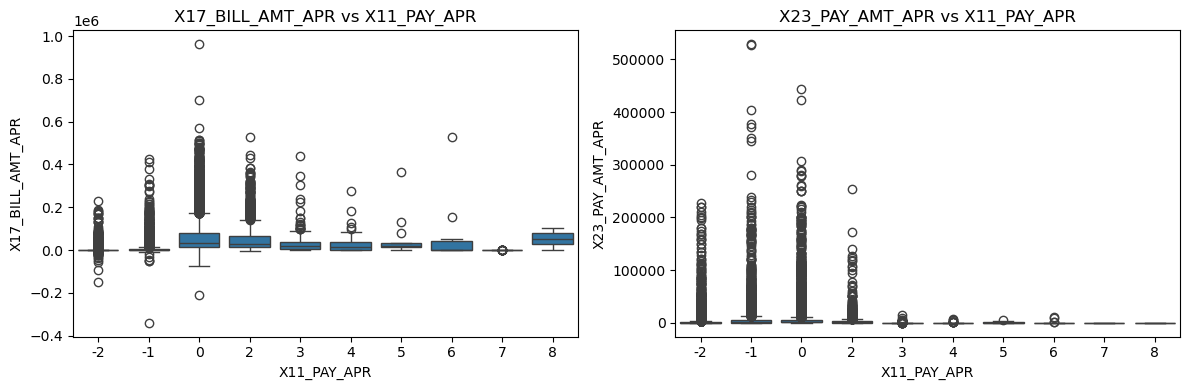

In [16]:
## statystyka dla cech numerycznych dla kategorii -2 i 0 nieudokumentowanych w opisie
numeric_cols = ['X1_LIMIT_BAL', 'X5_AGE'] + [f'X{i}_BILL_AMT_{month}' for i, month in zip(range(12, 18), ['SEP', 'AUG', 'JUL', 'JUN', 'MAY', 'APR'])] + [f'X{i}_PAY_AMT_{month}' for i, month in zip(range(18, 24), ['SEP', 'AUG', 'JUL', 'JUN', 'MAY', 'APR'])]


for col in pay_columns:
    month = col.split('_')[2]
    bill_col = f'X{int(col.split("_")[0][1:]) + 6}_BILL_AMT_{month}'
    pay_amt_col = f'X{int(col.split("_")[0][1:]) + 12}_PAY_AMT_{month}'
    print(f"\nStatystyki dla {col} (kategorie -2 i 0):")
    for category in [-2, 0]:
        subset = dataframe_prepared[dataframe_prepared[col] == category]
        if not subset.empty:
            print(f"\n  Kategoria {category}:")
            print(subset[[bill_col, pay_amt_col, 'X1_LIMIT_BAL', 'X5_AGE']].describe())


## wizualizacja rozkładu BILL_AMT i PAY_AMT dla kategorii -2 i 0
for col in pay_columns:
    month = col.split('_')[2]
    bill_col = f'X{int(col.split("_")[0][1:]) + 6}_BILL_AMT_{month}'
    pay_amt_col = f'X{int(col.split("_")[0][1:]) + 12}_PAY_AMT_{month}'
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=col, y=bill_col, data=dataframe_prepared)
    plt.title(f'{bill_col} vs {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=col, y=pay_amt_col, data=dataframe_prepared)
    plt.title(f'{pay_amt_col} vs {col}')
    plt.tight_layout()
    plt.show()

In [17]:
## analiza kategorii 8 dla X6_PAY_SEP–X11_PAY_APR
for col in ['X6_PAY_SEP', 'X7_PAY_AUG', 'X8_PAY_JUL', 'X9_PAY_JUN', 'X10_PAY_MAY', 'X11_PAY_APR']:
    month = col.split('_')[2]
    bill_col = f'X{int(col.split("_")[0][1:]) + 6}_BILL_AMT_{month}'
    subset = dataframe_prepared[dataframe_prepared[col] == 8]
    if not subset.empty:
        print(f"\n{col} (kategoria 8):")
        print("Rozkład Y_DEFAULT_PAYMENT:")
        print(subset['Y_DEFAULT_PAYMENT'].value_counts(normalize=True))
        print(f"Statystyki {bill_col}:")
        print(subset[bill_col].describe())


X6_PAY_SEP (kategoria 8):
Rozkład Y_DEFAULT_PAYMENT:
Y_DEFAULT_PAYMENT
1    0.578947
0    0.421053
Name: proportion, dtype: float64
Statystyki X12_BILL_AMT_SEP:
count        19.000000
mean     113754.000000
std      130118.491254
min       16942.000000
25%       24329.000000
50%       43340.000000
75%      144177.500000
max      477094.000000
Name: X12_BILL_AMT_SEP, dtype: float64

X7_PAY_AUG (kategoria 8):
Rozkład Y_DEFAULT_PAYMENT:
Y_DEFAULT_PAYMENT
0    1.0
1    0.0
Name: proportion, dtype: float64
Statystyki X13_BILL_AMT_AUG:
count        1.0
mean     25589.0
std          NaN
min      25589.0
25%      25589.0
50%      25589.0
75%      25589.0
max      25589.0
Name: X13_BILL_AMT_AUG, dtype: float64

X8_PAY_JUL (kategoria 8):
Rozkład Y_DEFAULT_PAYMENT:
Y_DEFAULT_PAYMENT
1    0.666667
0    0.333333
Name: proportion, dtype: float64
Statystyki X14_BILL_AMT_JUL:
count        3.000000
mean     20454.000000
std      17360.507251
min       2400.000000
25%      12168.000000
50%      21936.0

<Figure size 1200x600 with 0 Axes>

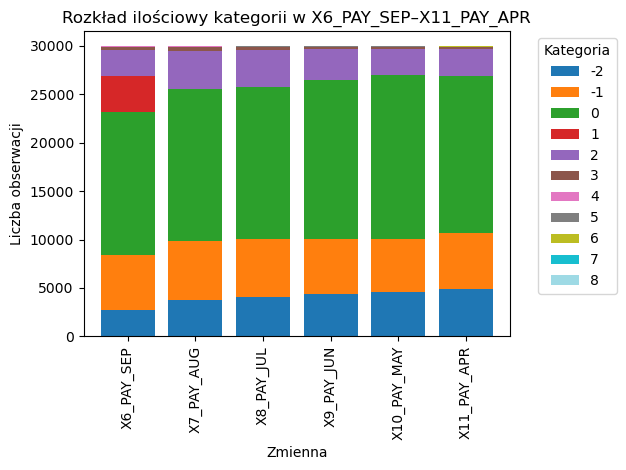

Liczności kategorii dla każdej zmiennej:

X6_PAY_SEP:
X6_PAY_SEP
-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: count, dtype: int64

X7_PAY_AUG:
X7_PAY_AUG
-2     3782
-1     6050
 0    15730
 1       28
 2     3927
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
Name: count, dtype: int64

X8_PAY_JUL:
X8_PAY_JUL
-2     4085
-1     5938
 0    15764
 1        4
 2     3819
 3      240
 4       76
 5       21
 6       23
 7       27
 8        3
Name: count, dtype: int64

X9_PAY_JUN:
X9_PAY_JUN
-2     4348
-1     5687
 0    16455
 1        2
 2     3159
 3      180
 4       69
 5       35
 6        5
 7       58
 8        2
Name: count, dtype: int64

X10_PAY_MAY:
X10_PAY_MAY
-2     4546
-1     5539
 0    16947
 2     2626
 3      178
 4       84
 5       17
 6        4
 7       58
 8        1
Name: count, dtype: int64

X11_PAY_APR:
X11_PAY_APR
-2     4895
-1     5740
 0    162

In [18]:
## przygotowanie danych do wizualizacji
category_counts = {}
for col in pay_columns:
    category_counts[col] = dataframe_prepared[col].value_counts().sort_index()

## tworzenie ramki danych z licznościami
counts_df = pd.DataFrame(category_counts).fillna(0).T

## wizualizacja - stacked bar plot
plt.figure(figsize=(12, 6))
counts_df.plot(kind='bar', stacked=True, colormap='tab20', width=0.8)
plt.title('Rozkład ilościowy kategorii w X6_PAY_SEP–X11_PAY_APR')
plt.xlabel('Zmienna')
plt.ylabel('Liczba obserwacji')
plt.legend(title='Kategoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## wyświetlenie liczności dla każdej kategorii pay_columns
print("Liczności kategorii dla każdej zmiennej:")
for col in pay_columns:
    print(f"\n{col}:")
    print(dataframe_prepared[col].value_counts().sort_index())

In [19]:
"""

Kategorie -2 i 0 zachowujemy jako osobne kategorie, bo są pewne różnice w Y_DEFAULT_PAYMENT 
i statystykach BILL_AMT/PAY_AMT sugerują, że wnoszą unikalną informację.
-2 prawdopodobnie oznacza „przedpłatę” (zerowe/ujemne rachunki, niskie spłaty), a 0 „brak wymaganej płatności” (niskie, ale dodatnie rachunki).
Potwierdzono, że kategoria 8 jest rzadka (1–19 obserwacji) i nie wydaje się substytutem 9 (rachunki nie są ekstremalnie wysokie). 
Brak kategorii 9 to prawdopodobnie cecha danych, więc nie wymaga korekty.

"""

## EDA ##
features = ['X1_LIMIT_BAL','X2_SEX','X3_EDUCATION','X4_MARRIAGE','X5_AGE','X6_PAY_SEP','X7_PAY_AUG','X8_PAY_JUL','X9_PAY_JUN','X10_PAY_MAY','X11_PAY_APR','X12_BILL_AMT_SEP','X13_BILL_AMT_AUG','X14_BILL_AMT_JUL','X15_BILL_AMT_JUN','X16_BILL_AMT_MAY','X17_BILL_AMT_APR','X18_PAY_AMT_SEP','X19_PAY_AMT_AUG','X20_PAY_AMT_JUL','X21_PAY_AMT_JUN','X22_PAY_AMT_MAY','X23_PAY_AMT_APR']
target = 'Y_DEFAULT_PAYMENT'


dataframe_prepared[features].describe()

,X1_LIMIT_BAL,X5_AGE,X12_BILL_AMT_SEP,X13_BILL_AMT_AUG,X14_BILL_AMT_JUL,X15_BILL_AMT_JUN,X16_BILL_AMT_MAY,X17_BILL_AMT_APR,X18_PAY_AMT_SEP,X19_PAY_AMT_AUG,X20_PAY_AMT_JUL,X21_PAY_AMT_JUN,X22_PAY_AMT_MAY,X23_PAY_AMT_APR
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [20]:
pd.Series(dataframe_prepared[target]).value_counts(normalize=True)

Y_DEFAULT_PAYMENT
0    0.7788
1    0.2212
Name: proportion, dtype: float64

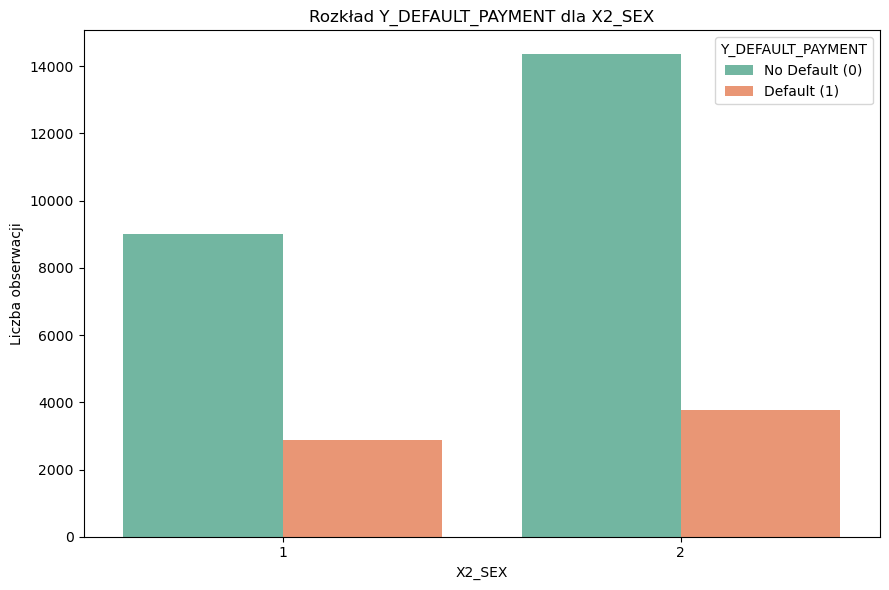

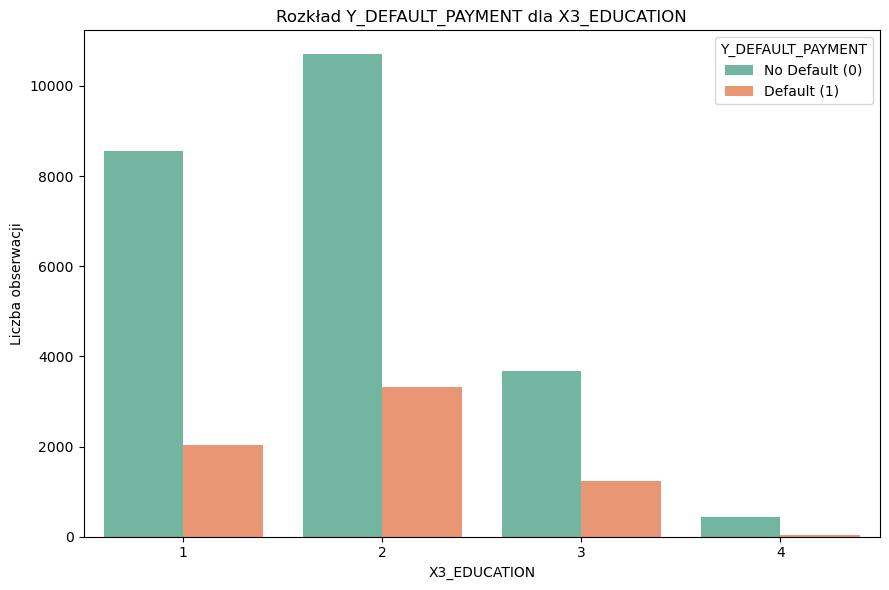

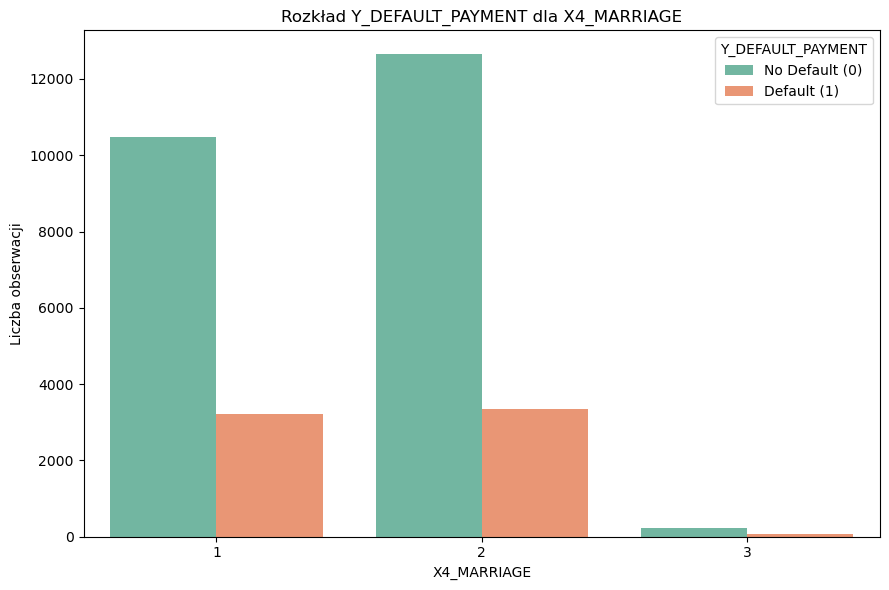

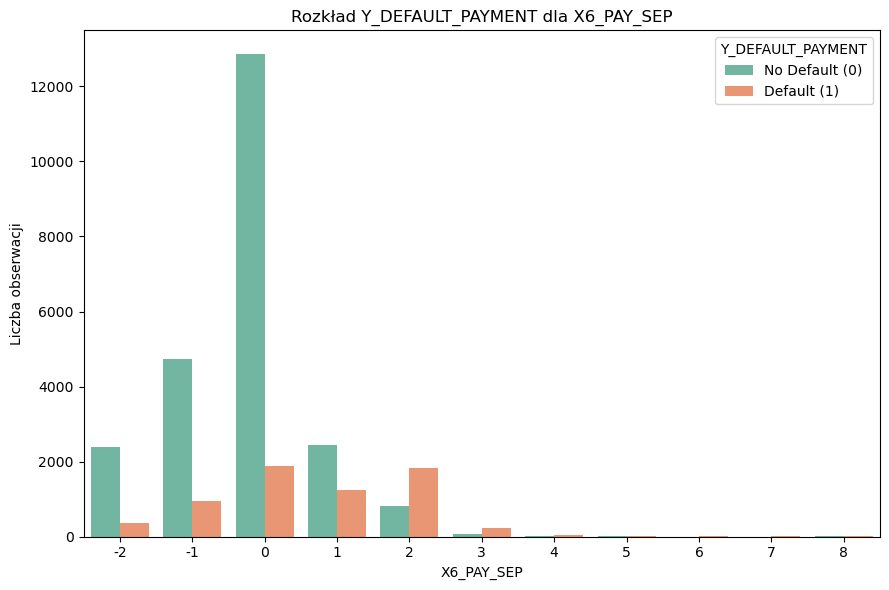

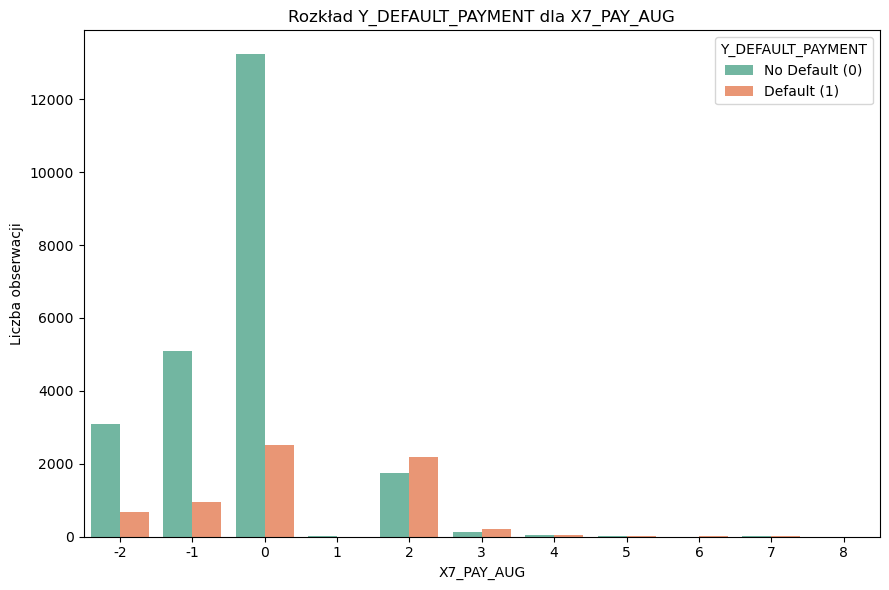

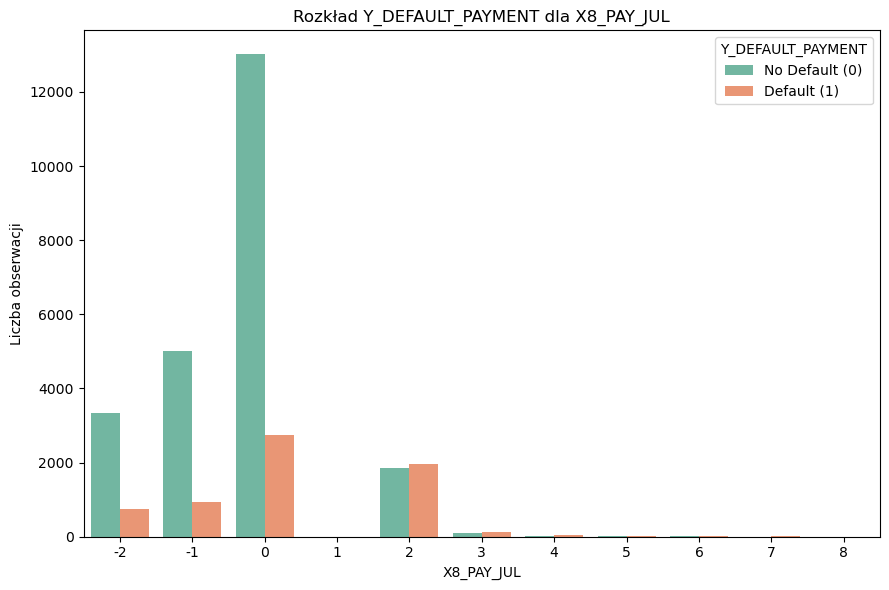

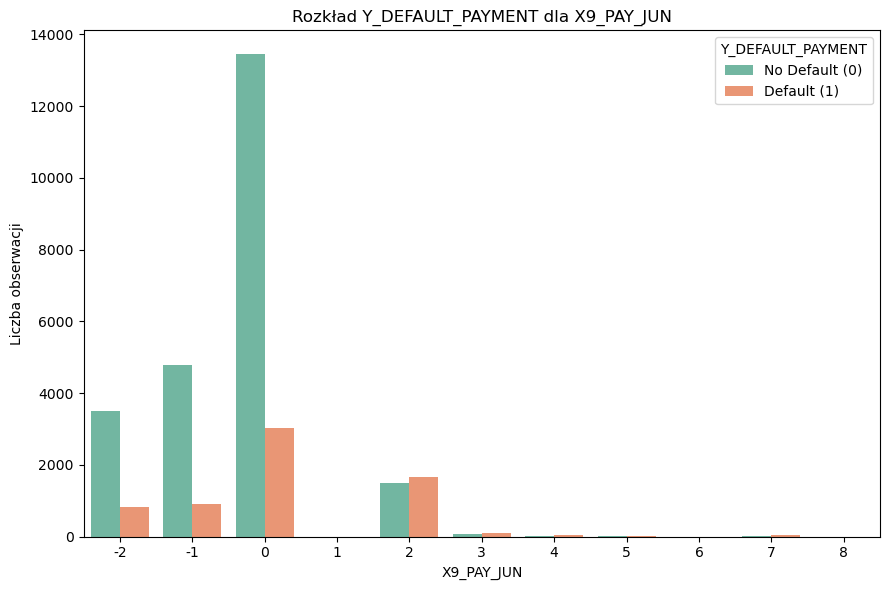

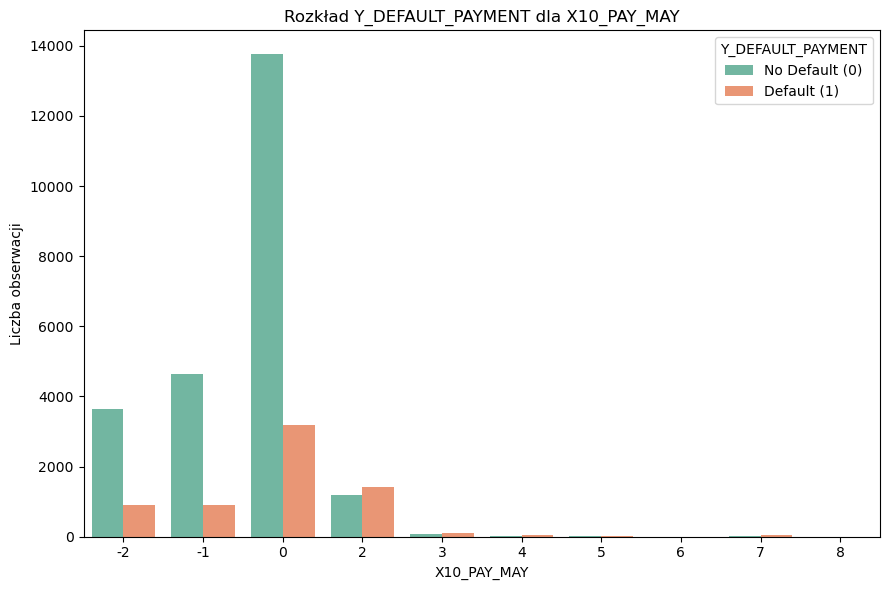

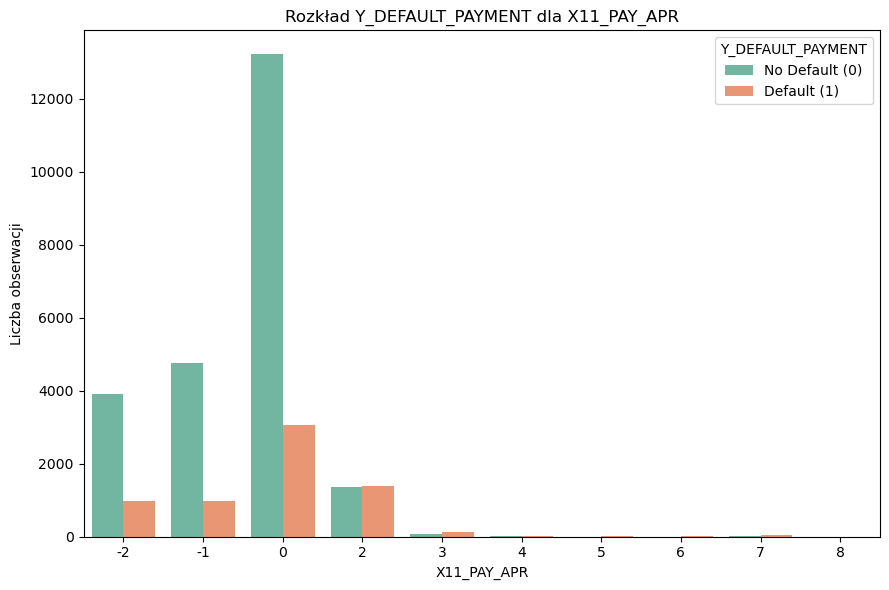

In [21]:
### wykresy słupkowe dla zmiennych kategorycznych
categorical_features = ['X2_SEX', 'X3_EDUCATION', 'X4_MARRIAGE', 'X6_PAY_SEP', 'X7_PAY_AUG', 'X8_PAY_JUL', 'X9_PAY_JUN', 'X10_PAY_MAY', 'X11_PAY_APR']

for col in categorical_features:
    plt.figure(figsize=(9, 6))
    sns.countplot(x=col, hue='Y_DEFAULT_PAYMENT', data=dataframe_prepared, palette='Set2')
    plt.title(f'Rozkład Y_DEFAULT_PAYMENT dla {col}')
    plt.xlabel(col)
    plt.ylabel('Liczba obserwacji')
    plt.legend(title='Y_DEFAULT_PAYMENT', labels=['No Default (0)', 'Default (1)'])
    plt.tight_layout()
    plt.show()

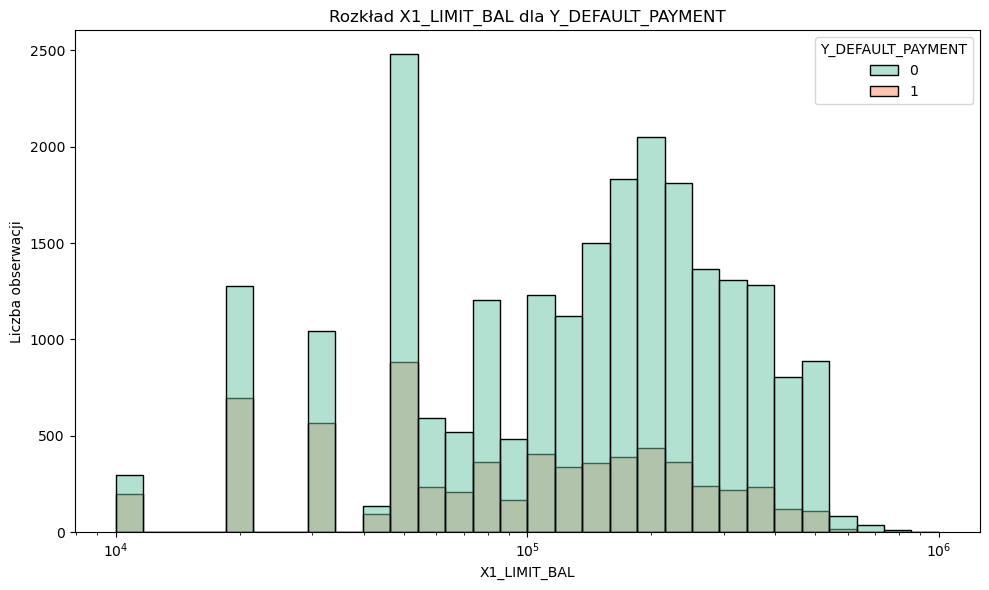

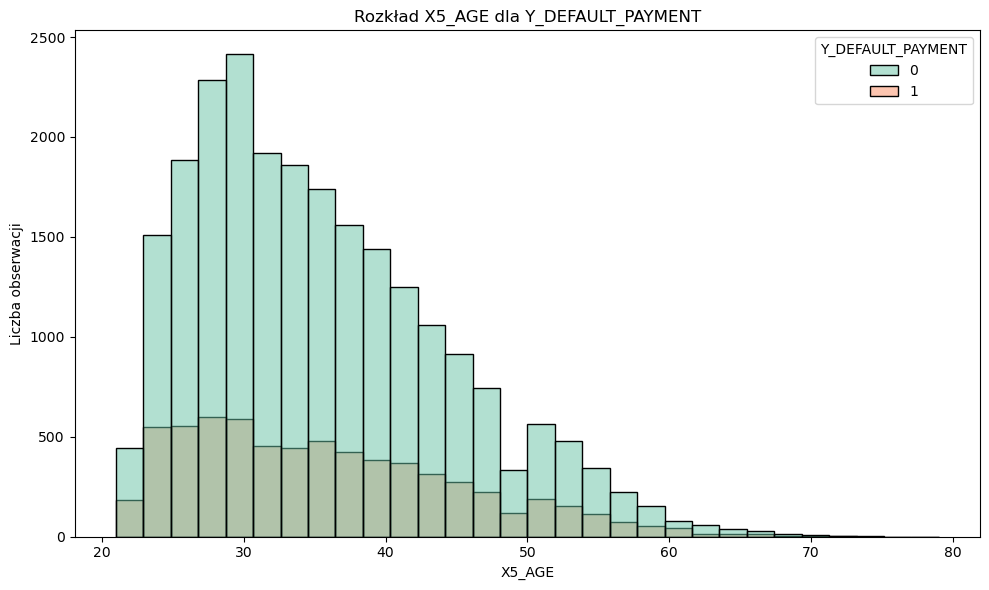

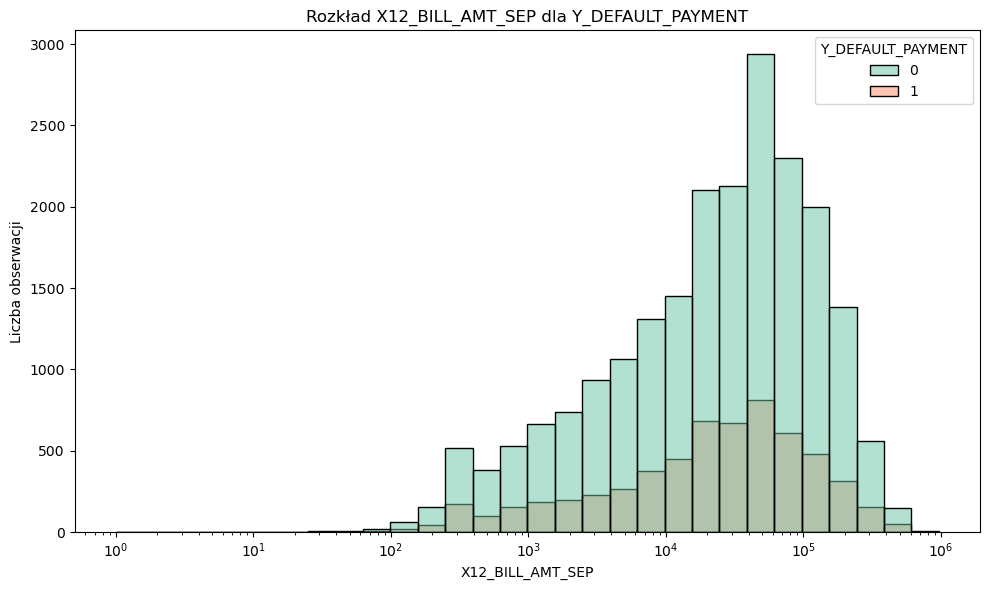

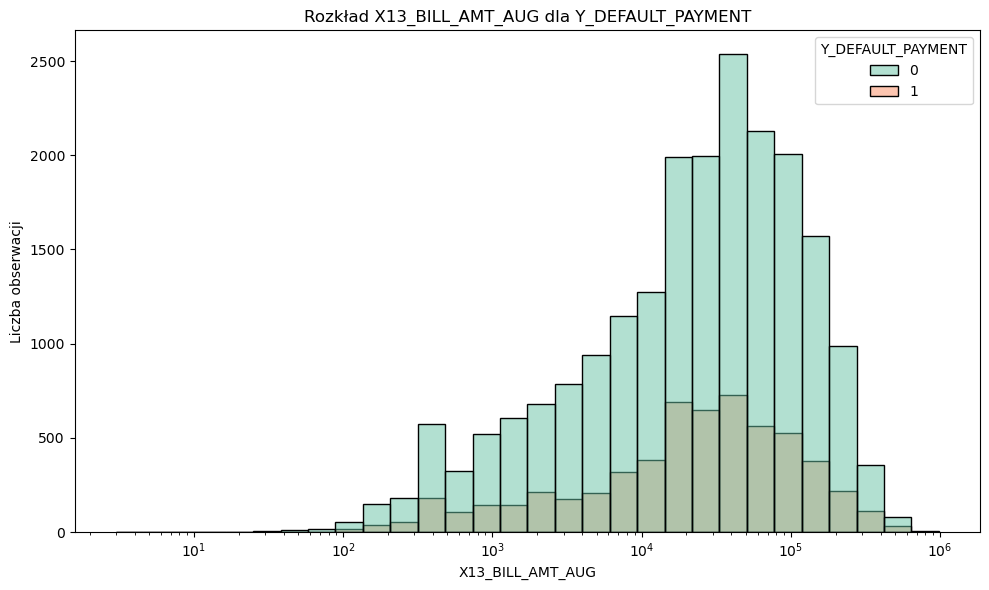

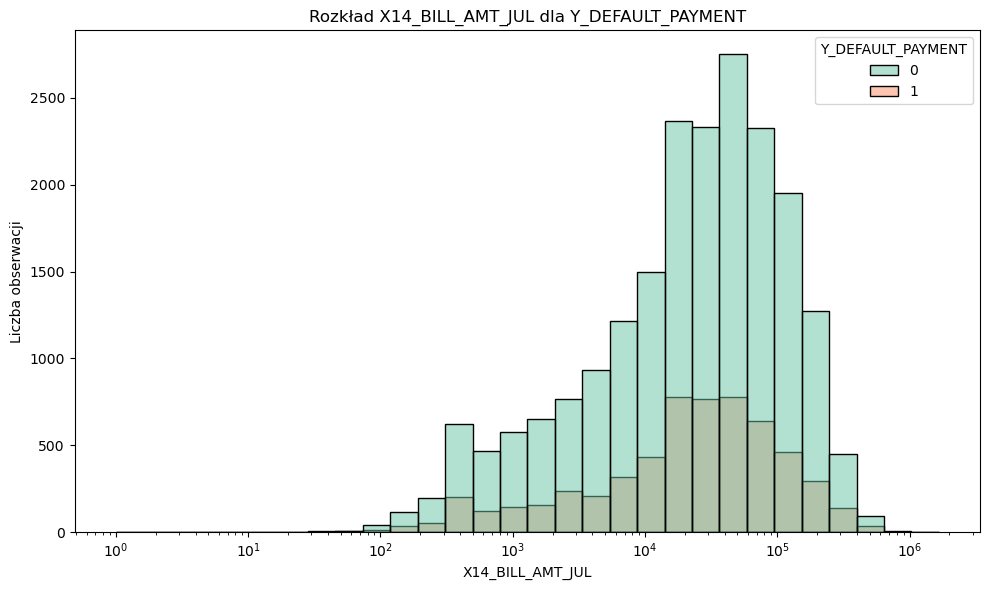

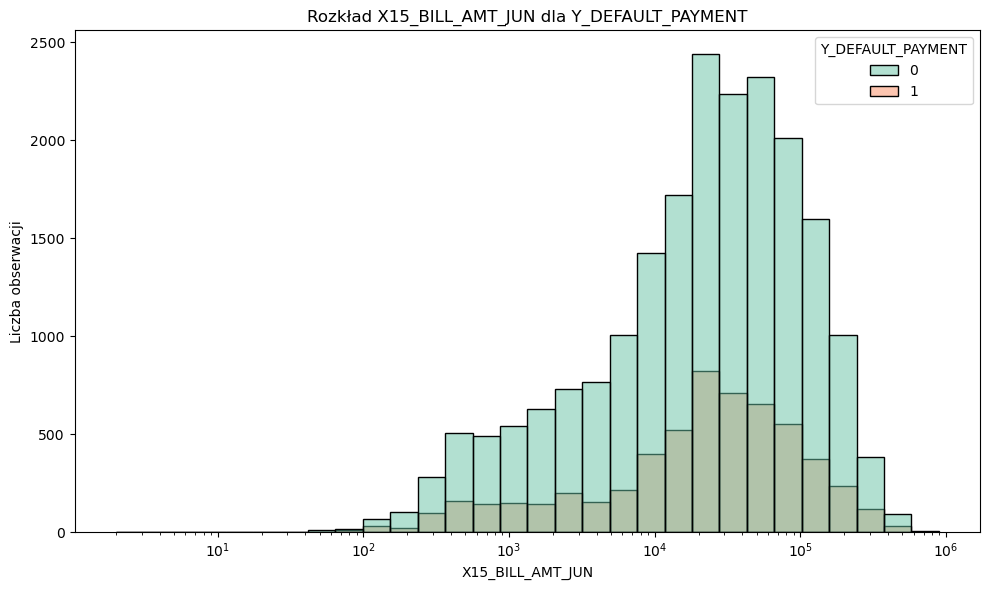

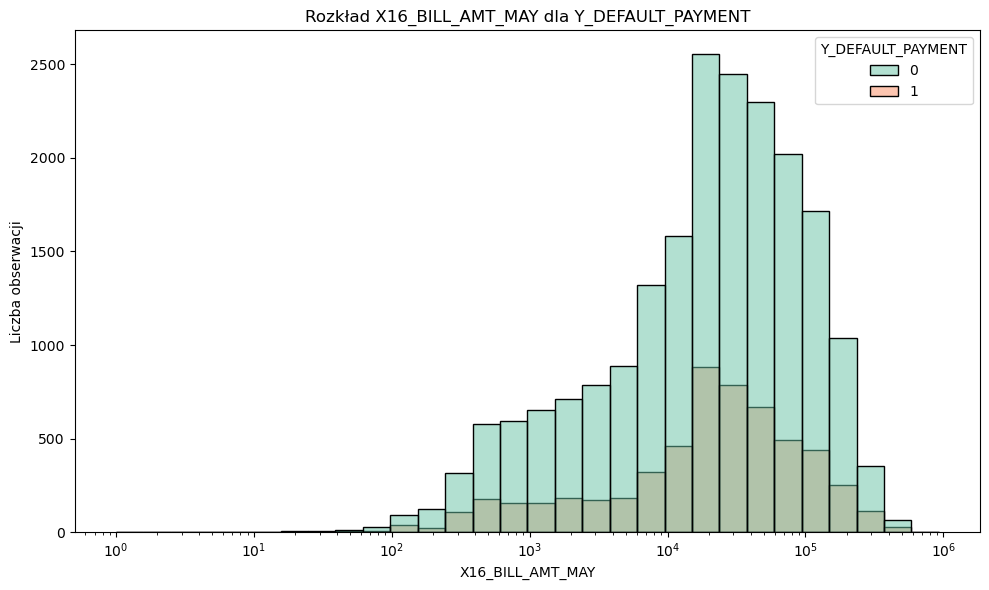

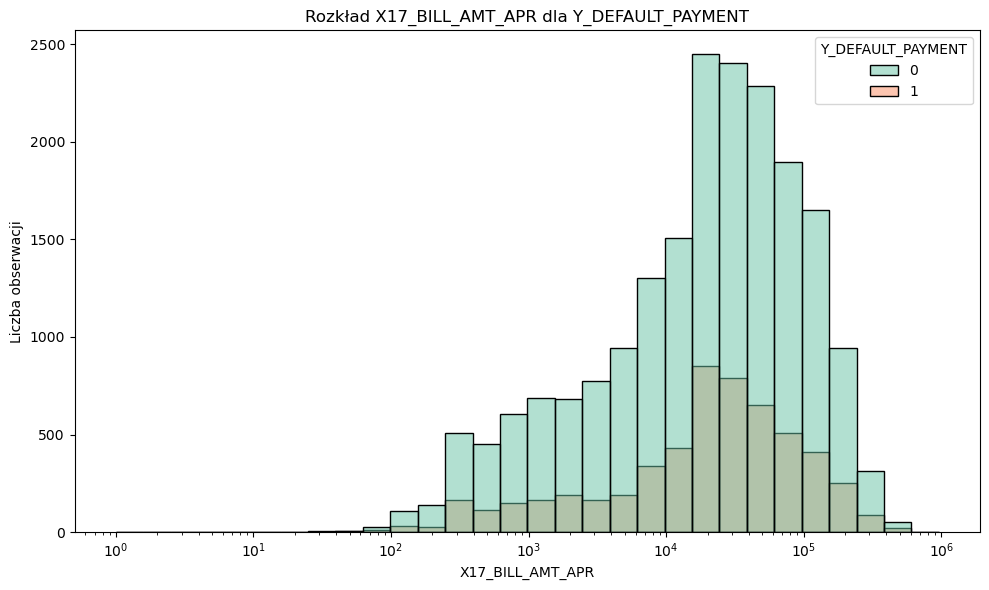

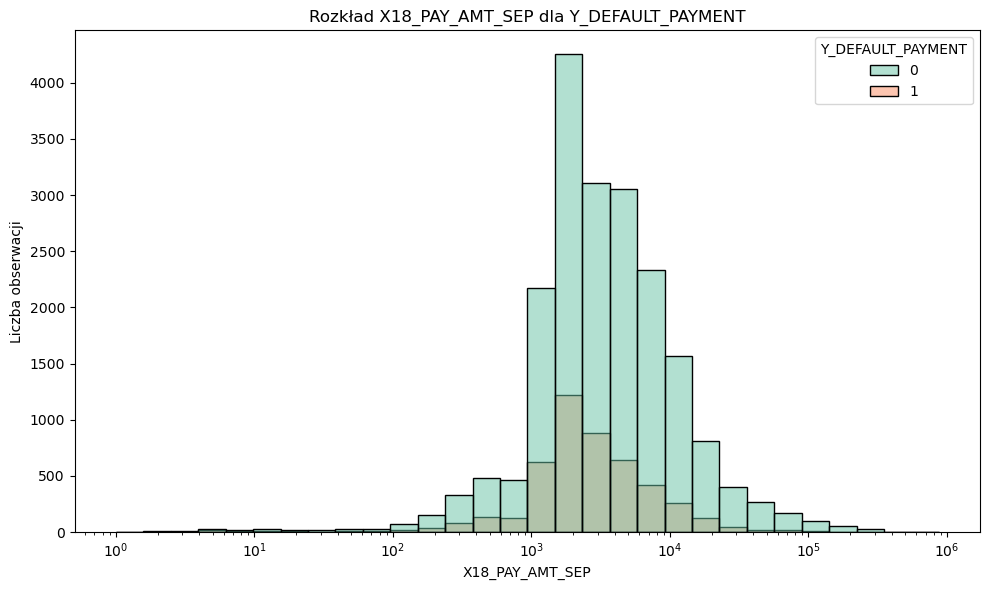

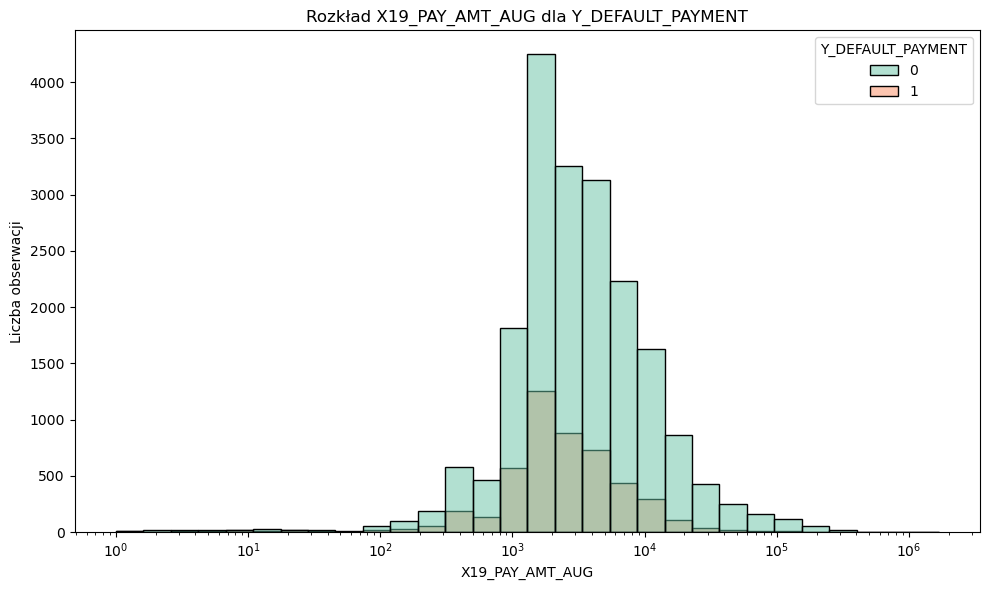

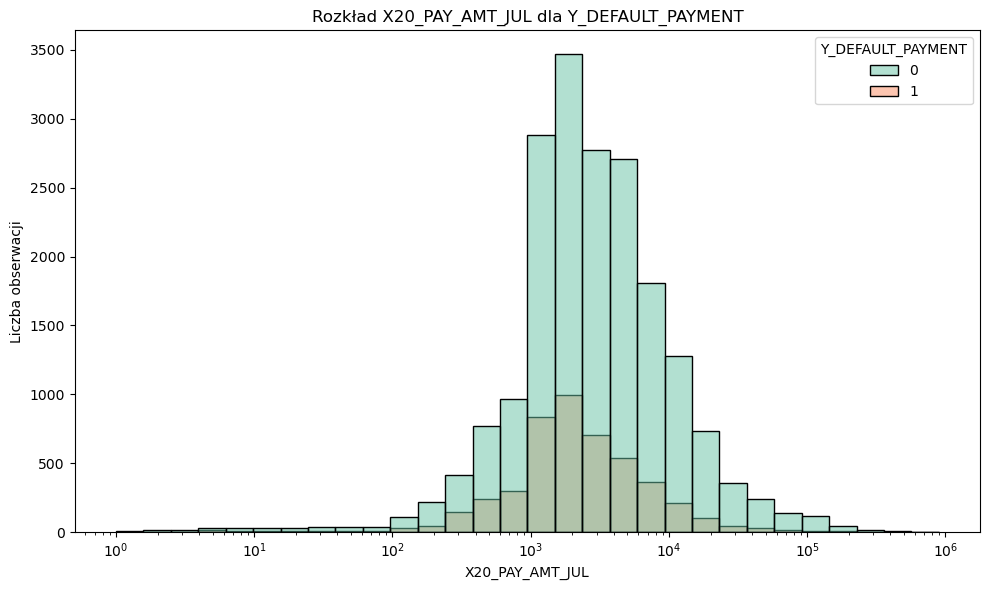

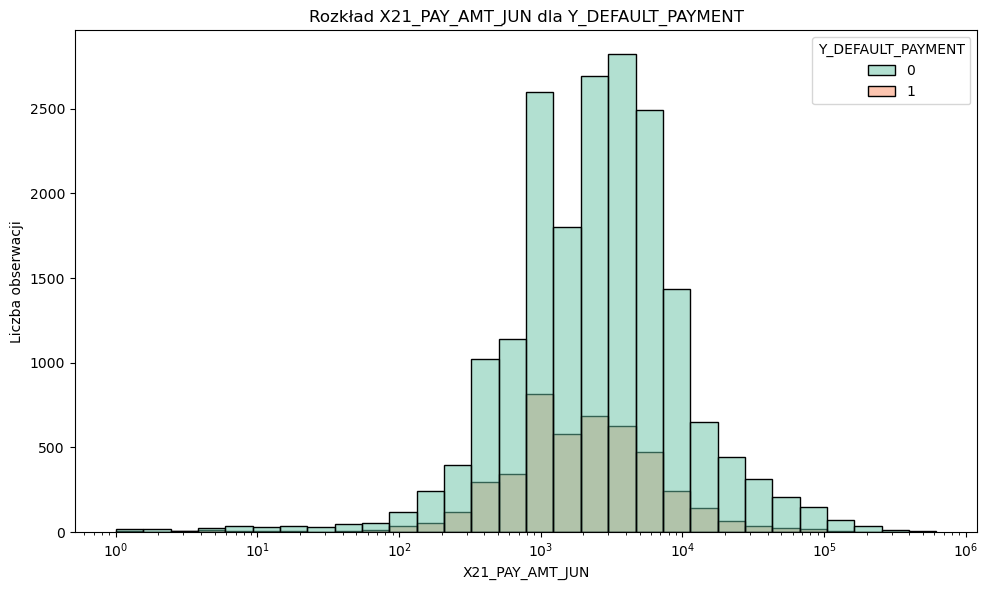

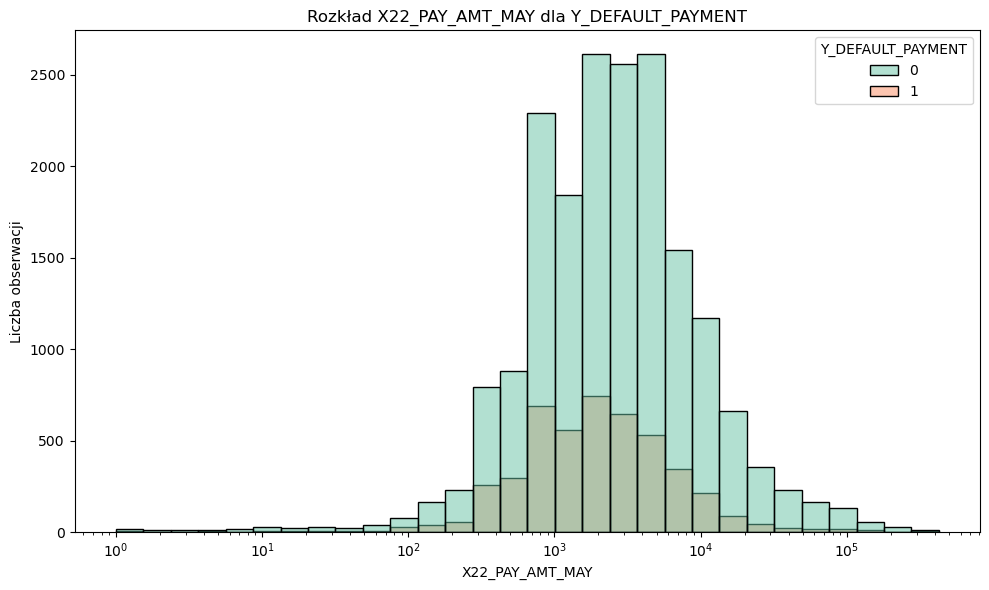

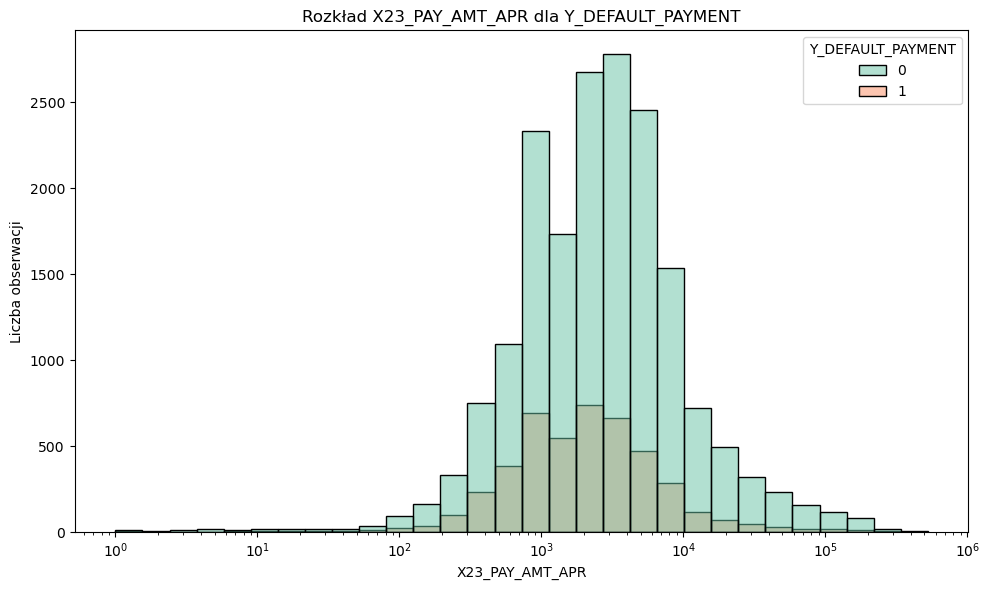

In [22]:
### histogramy dla zmiennych numerycznych
numeric_features = ['X1_LIMIT_BAL', 'X5_AGE', 'X12_BILL_AMT_SEP', 'X13_BILL_AMT_AUG', 'X14_BILL_AMT_JUL', 
                    'X15_BILL_AMT_JUN', 'X16_BILL_AMT_MAY', 'X17_BILL_AMT_APR', 'X18_PAY_AMT_SEP', 
                    'X19_PAY_AMT_AUG', 'X20_PAY_AMT_JUL', 'X21_PAY_AMT_JUN', 'X22_PAY_AMT_MAY', 'X23_PAY_AMT_APR']

for col in numeric_features:
    plt.figure(figsize=(10, 6))
    # log-skala dla zmiennych z dużymi wartościami, z obsługą tylko dla wartości > 0
    if col != 'X5_AGE':
        # filtruje dane, aby zawierały tylko wartości > 0 przed zastosowaniem skali log
        plot_data = dataframe_prepared[dataframe_prepared[col] > 0]
        sns.histplot(data=plot_data, x=col, hue='Y_DEFAULT_PAYMENT', log_scale=(True, False), bins=30, palette='Set2')
    else:
        # dla age nie ma potrzeby filtrowania
        sns.histplot(data=dataframe_prepared, x=col, hue='Y_DEFAULT_PAYMENT', bins=30, palette='Set2')
    plt.title(f'Rozkład {col} dla Y_DEFAULT_PAYMENT')
    plt.xlabel(col)
    plt.ylabel('Liczba obserwacji')
    plt.tight_layout()
    plt.show()

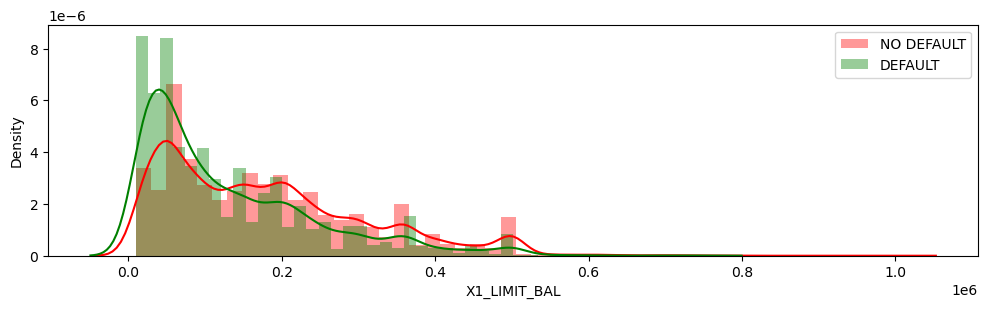

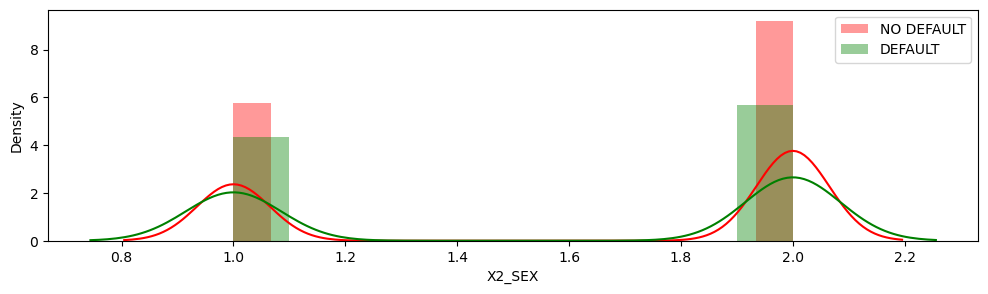

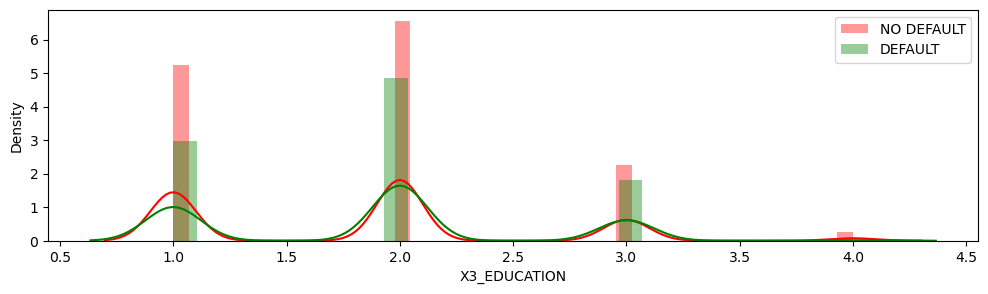

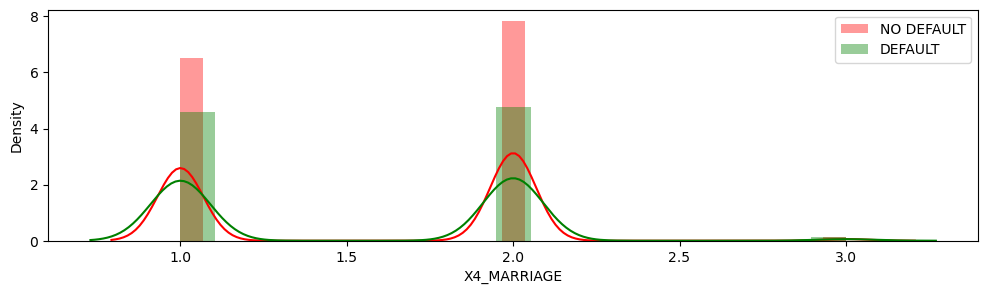

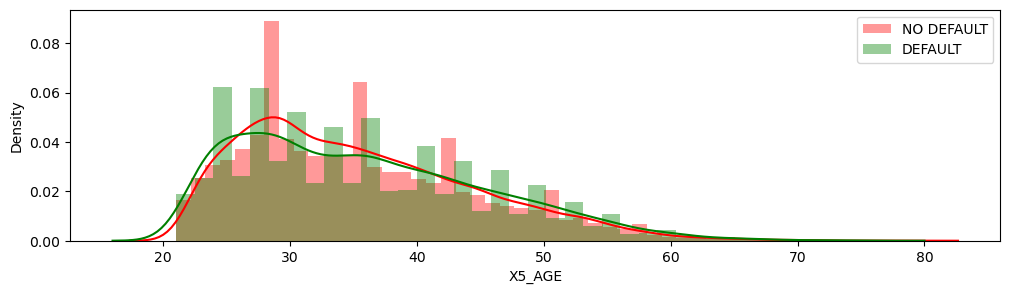

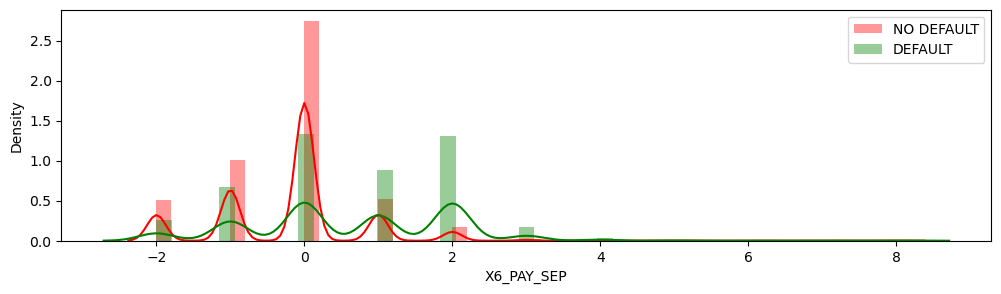

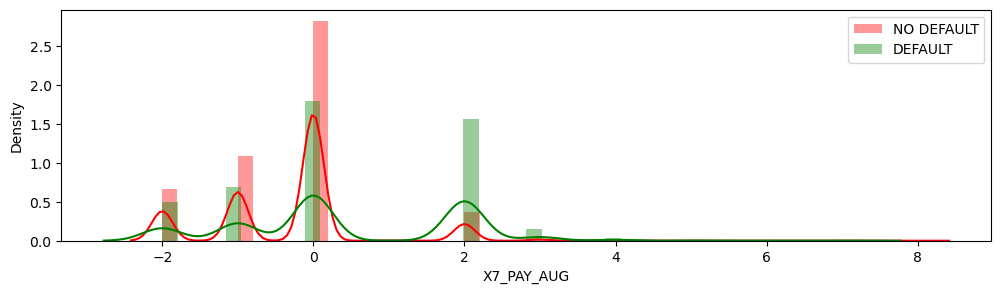

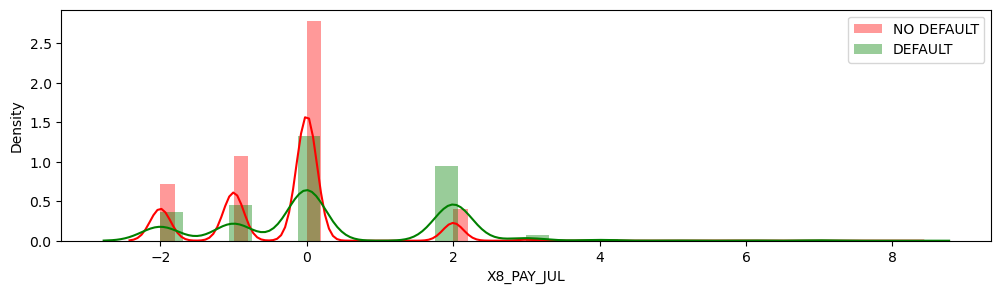

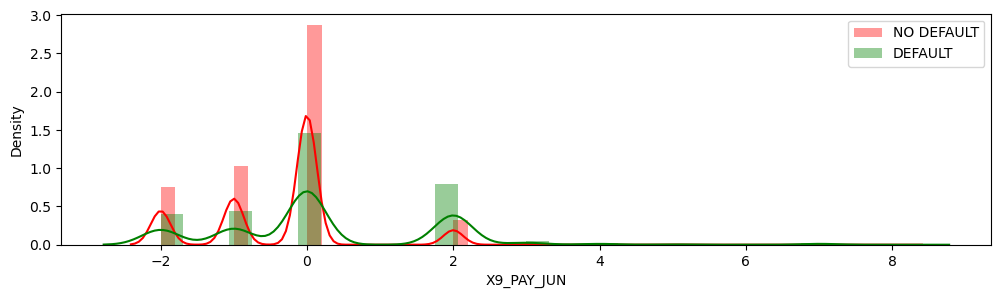

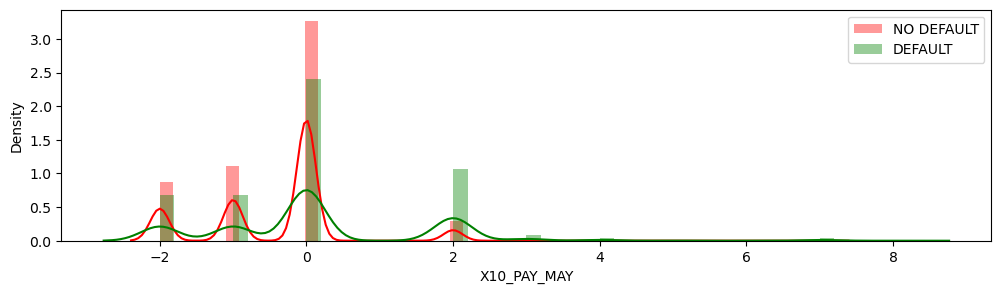

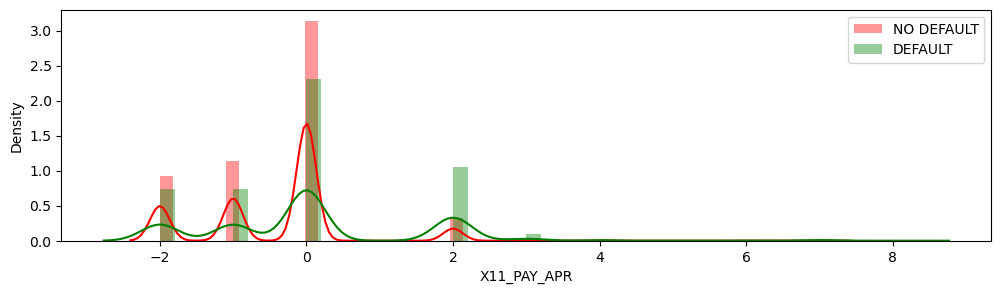

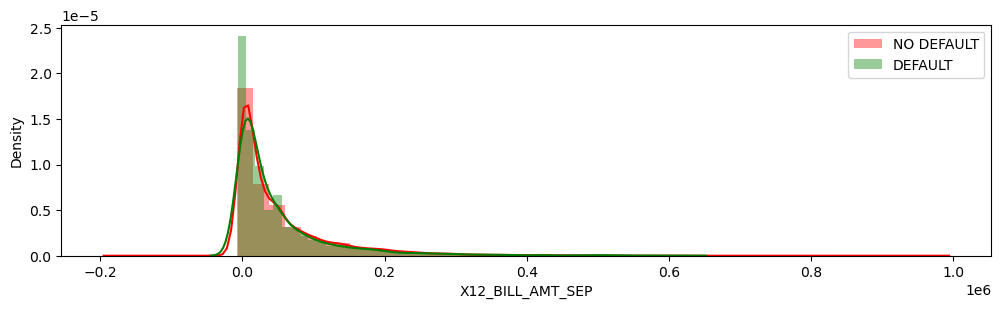

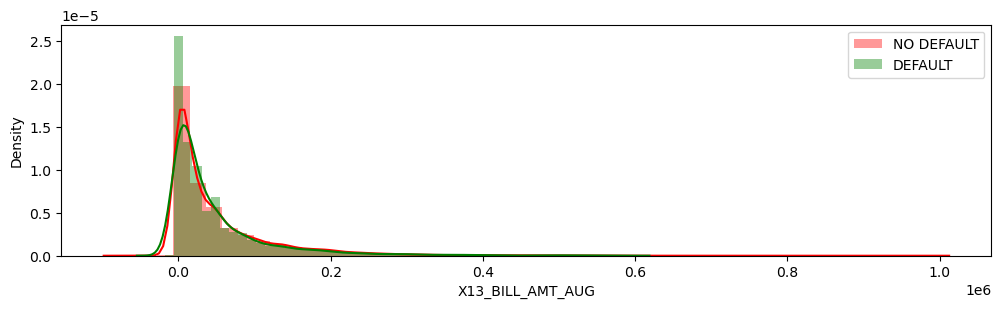

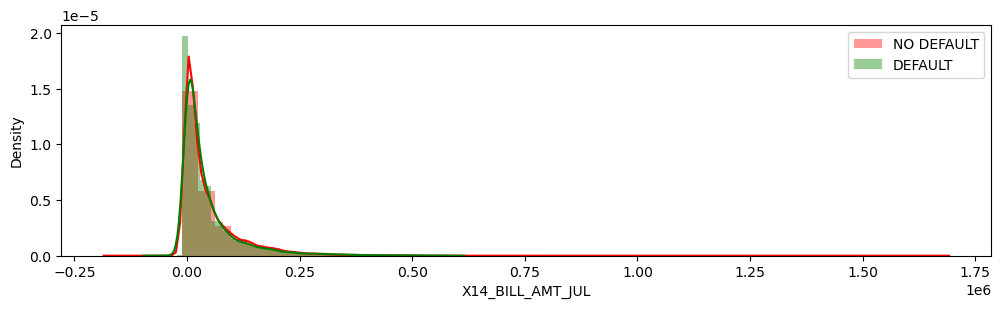

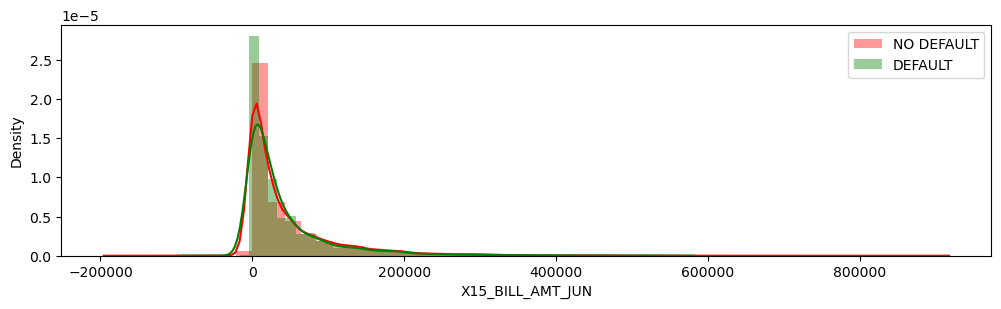

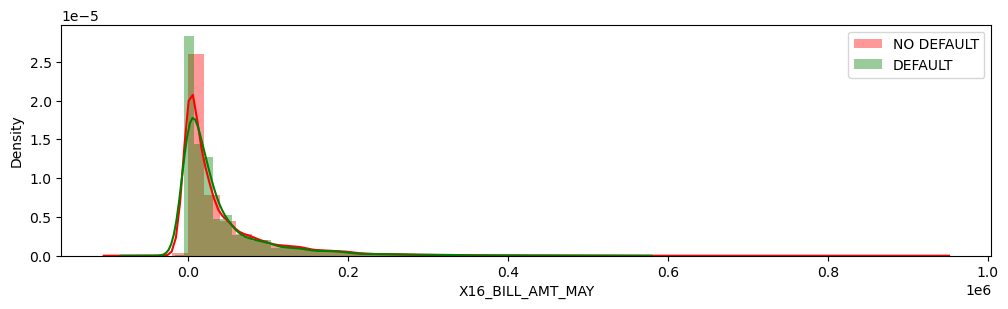

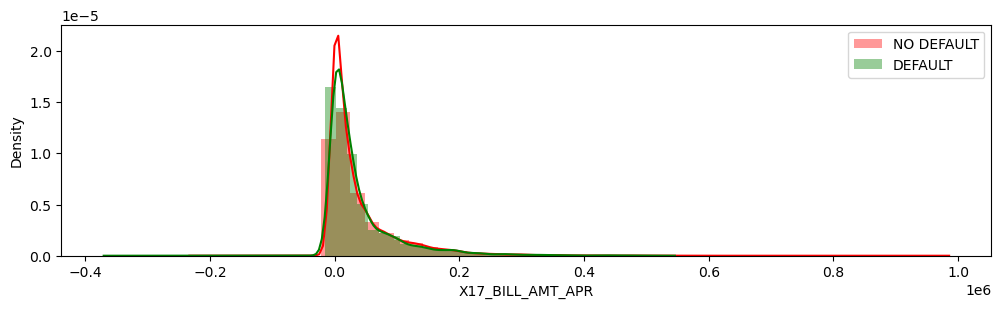

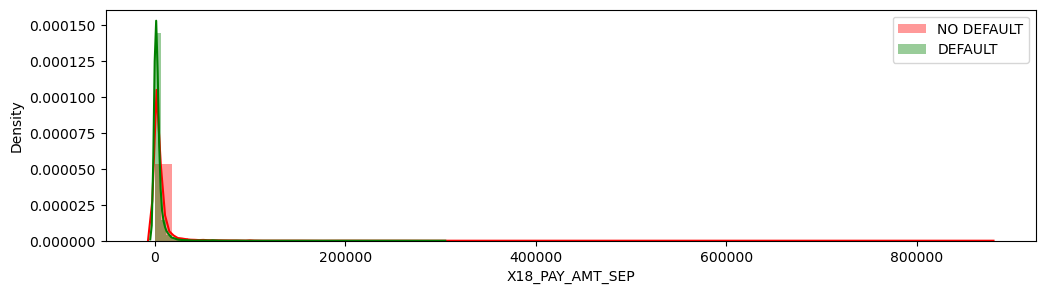

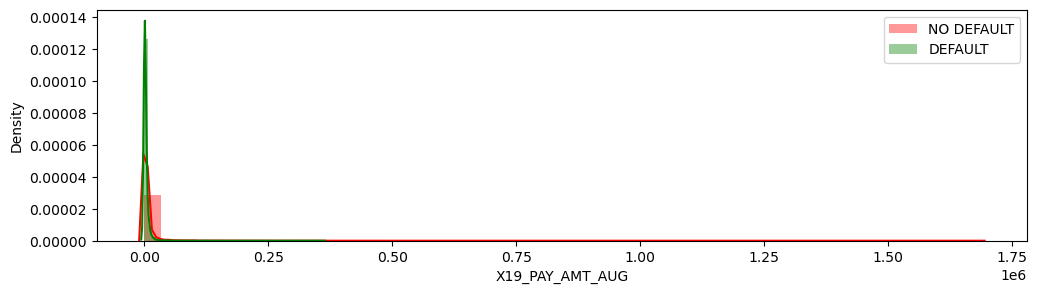

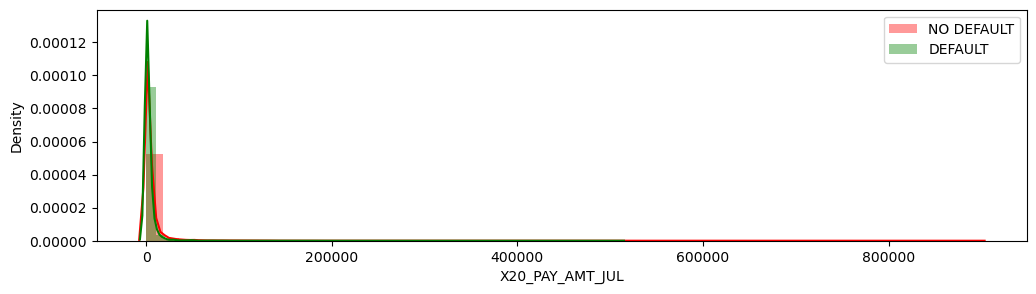

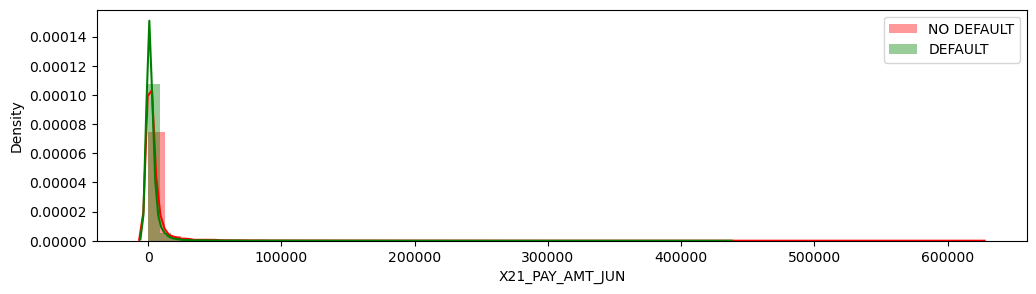

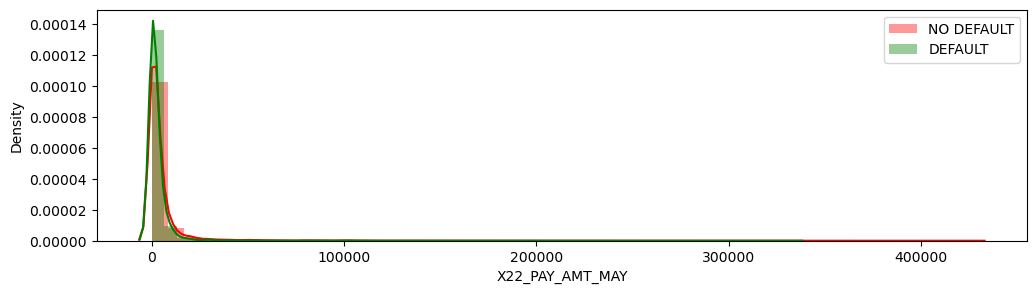

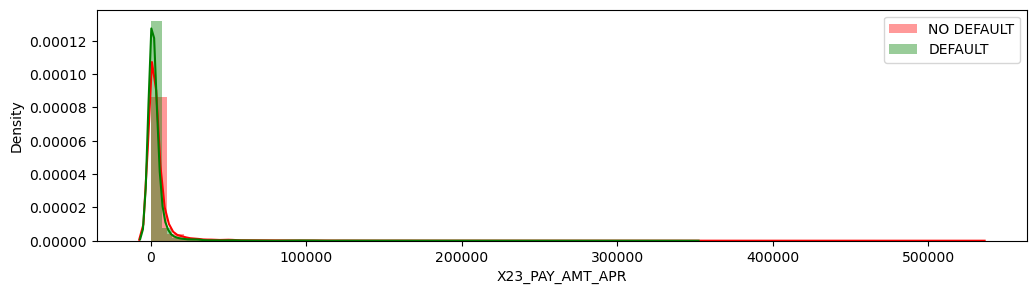

In [23]:
for col in features:
    plt.figure(figsize=(12, 3))
    sns.distplot(dataframe_prepared.loc[dataframe_prepared['Y_DEFAULT_PAYMENT']==0, col], kde=True, color='red', label='NO DEFAULT')
    sns.distplot(dataframe_prepared.loc[dataframe_prepared['Y_DEFAULT_PAYMENT']==1, col], kde=True, color='green', label='DEFAULT')
    plt.legend(loc='upper right')
    plt.show()

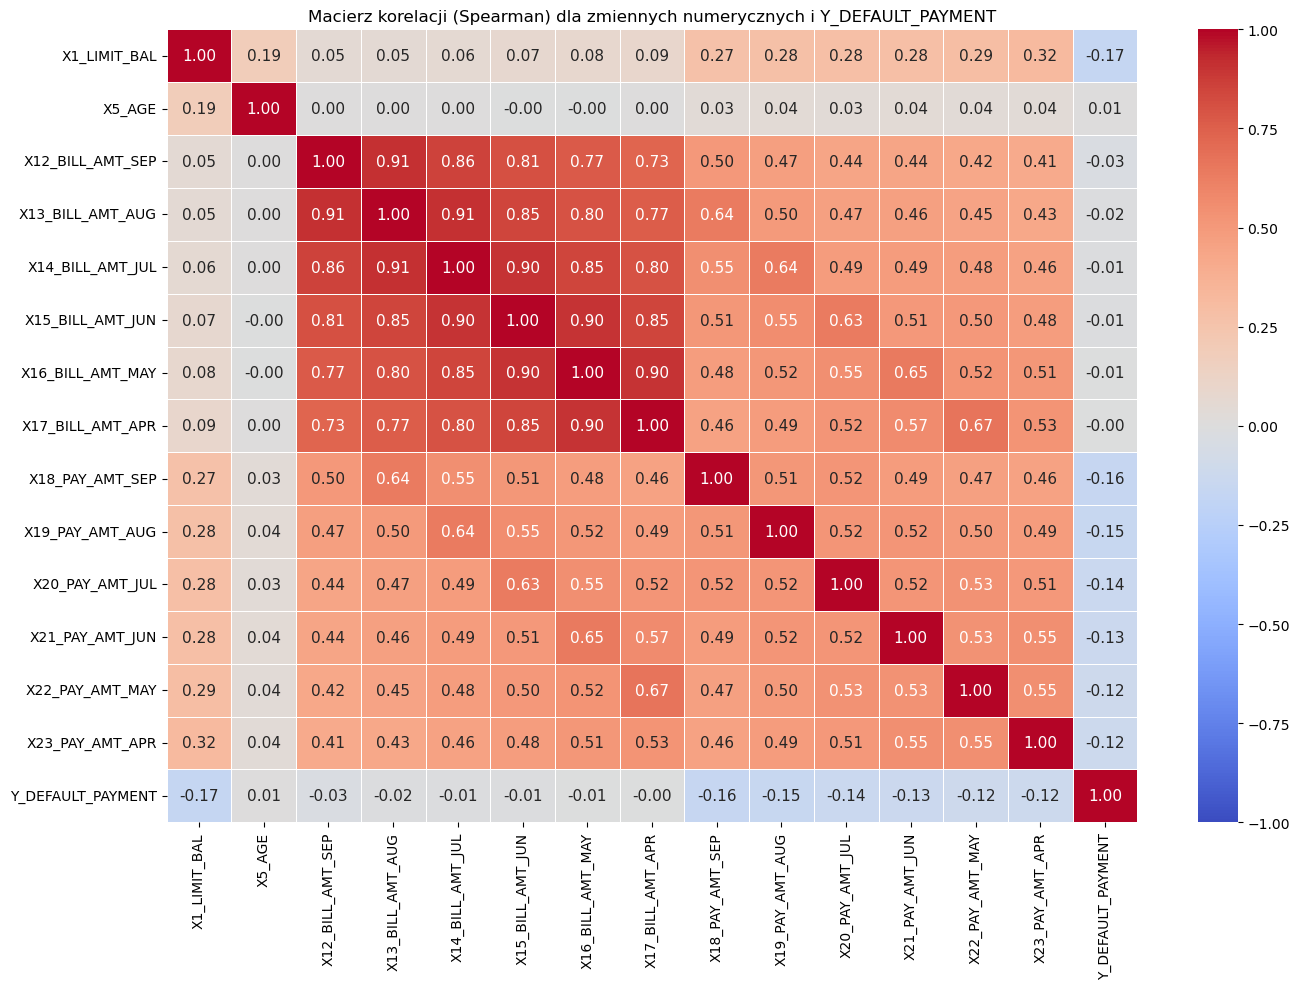

In [24]:
## macierz korelacji dla zmiennych numerycznych (korelacja Spearmana, bo dane są skośne)
plt.figure(figsize=(14, 10))
corr_matrix = dataframe_prepared[numeric_features + ['Y_DEFAULT_PAYMENT']].corr(method='spearman')
# zamiana NaN na 0 dla wizualizacji (uwaga: tylko do wyświetlenia, nie zmienia danych)
corr_matrix_display = corr_matrix.fillna(0)
sns.heatmap(corr_matrix_display, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f', linewidths=0.5, annot_kws={'size': 11})
plt.title('Macierz korelacji (Spearman) dla zmiennych numerycznych i Y_DEFAULT_PAYMENT')
plt.tight_layout()
plt.show()

In [25]:
## macierz korelacji z Y_DEFAULT_PAYMENT (zmienna objaśniana kategoryczna jest binarna) dla zmiennych numerycznych (Point-biserial correlation)
from scipy.stats import pointbiserialr
correlations = {}
for col in numeric_features:
    corr, _ = pointbiserialr(dataframe_prepared[col], dataframe_prepared['Y_DEFAULT_PAYMENT'])
    correlations[col] = corr
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])
print(corr_df.sort_values(by='Correlation', ascending=False))

                  Correlation
X5_AGE               0.013890
X17_BILL_AMT_APR    -0.005372
X16_BILL_AMT_MAY    -0.006760
X15_BILL_AMT_JUN    -0.010156
X14_BILL_AMT_JUL    -0.014076
X13_BILL_AMT_AUG    -0.014193
X12_BILL_AMT_SEP    -0.019644
X23_PAY_AMT_APR     -0.053183
X22_PAY_AMT_MAY     -0.055124
X20_PAY_AMT_JUL     -0.056250
X21_PAY_AMT_JUN     -0.056827
X19_PAY_AMT_AUG     -0.058579
X18_PAY_AMT_SEP     -0.072929
X1_LIMIT_BAL        -0.153520


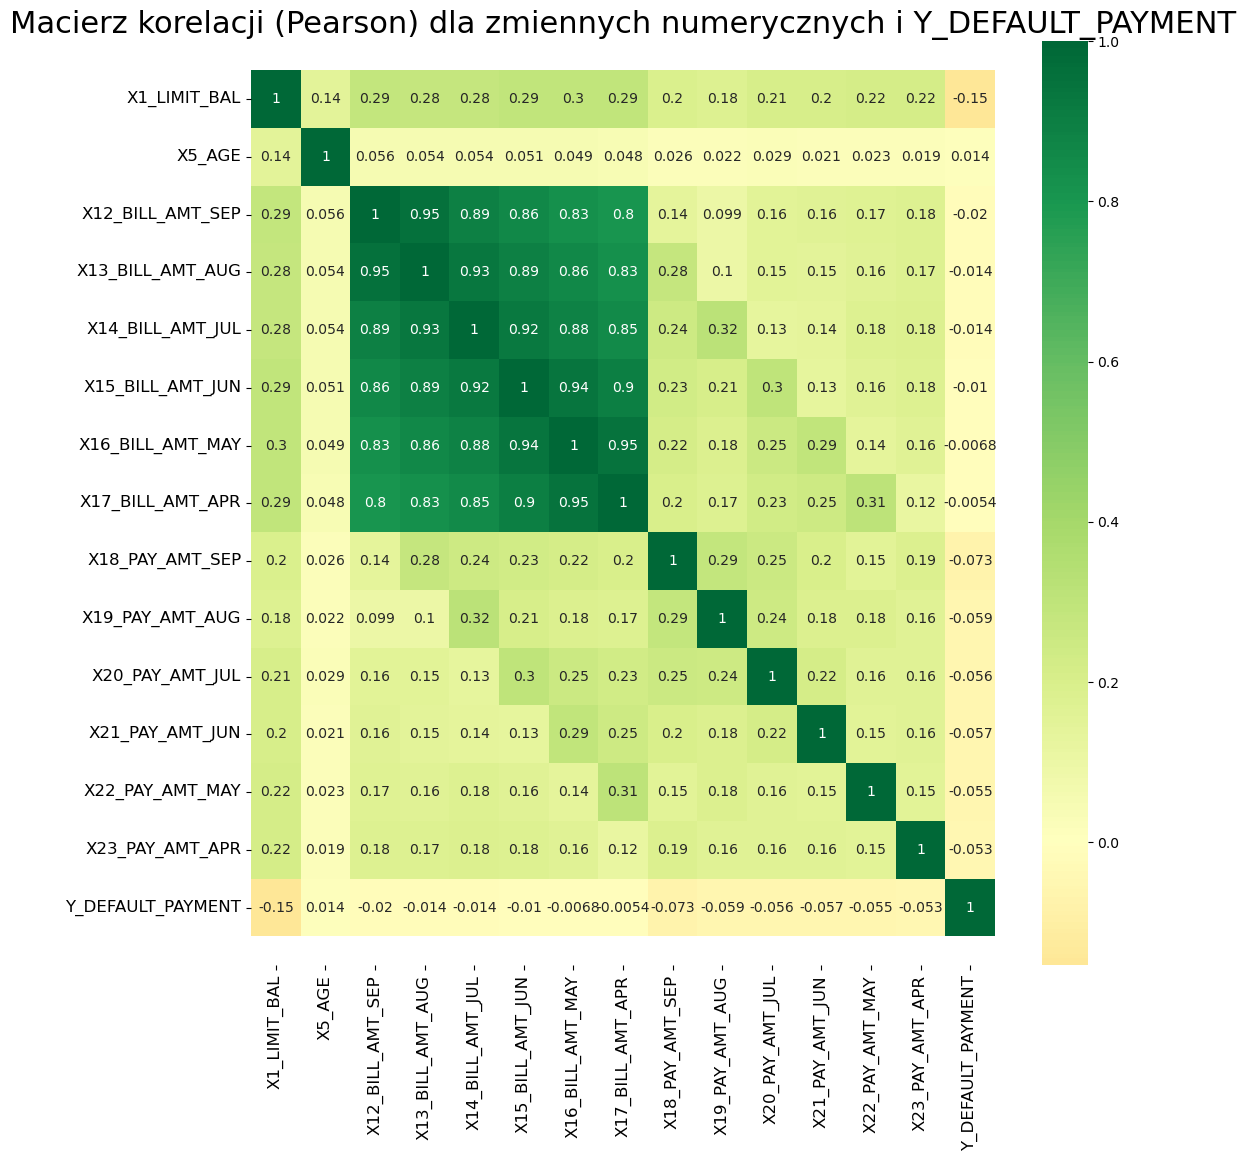

In [26]:
## macierz korelacji dla zmiennych numerycznych (Pearson)

plt.figure(figsize=(12, 12))
corr_num_matrix = dataframe_prepared[numeric_features + ['Y_DEFAULT_PAYMENT']].corr()
ax = sns.heatmap(corr_num_matrix,
                 xticklabels=corr_num_matrix.columns,
                 yticklabels=corr_num_matrix.columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Macierz korelacji (Pearson) dla zmiennych numerycznych i Y_DEFAULT_PAYMENT', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [27]:
## korelacja dla zmiennych kategorycznych wzajemna i z Y_DEFAULT_PAYMENT

from scipy.stats import chi2_contingency

# korelacja z Y_DEFAULT_PAYMENT (phi coefficient)
for col in categorical_features:
    contingency_table = pd.crosstab(dataframe_prepared[col], dataframe_prepared['Y_DEFAULT_PAYMENT'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi = np.sqrt(chi2 / n)
    print(f"Korelacja phi między {col} a Y_DEFAULT_PAYMENT: {phi:.3f} (p-value: {p:.3f})")

# korelacja wzajemna między zmiennymi kategorycznymi (Cramér's V)
from scipy.stats.contingency import association

for i, col1 in enumerate(categorical_features):
    for col2 in categorical_features[i+1:]:
        contingency_table = pd.crosstab(dataframe_prepared[col1], dataframe_prepared[col2])
        cramers_v = association(contingency_table, method='cramer')
        print(f"Cramér's V między {col1} a {col2}: {cramers_v:.3f}")

Korelacja phi między X2_SEX a Y_DEFAULT_PAYMENT: 0.040 (p-value: 0.000)
Korelacja phi między X3_EDUCATION a Y_DEFAULT_PAYMENT: 0.073 (p-value: 0.000)
Korelacja phi między X4_MARRIAGE a Y_DEFAULT_PAYMENT: 0.032 (p-value: 0.000)
Korelacja phi między X6_PAY_SEP a Y_DEFAULT_PAYMENT: 0.423 (p-value: 0.000)
Korelacja phi między X7_PAY_AUG a Y_DEFAULT_PAYMENT: 0.340 (p-value: 0.000)
Korelacja phi między X8_PAY_JUL a Y_DEFAULT_PAYMENT: 0.296 (p-value: 0.000)
Korelacja phi między X9_PAY_JUN a Y_DEFAULT_PAYMENT: 0.279 (p-value: 0.000)
Korelacja phi między X10_PAY_MAY a Y_DEFAULT_PAYMENT: 0.271 (p-value: 0.000)
Korelacja phi między X11_PAY_APR a Y_DEFAULT_PAYMENT: 0.251 (p-value: 0.000)
Cramér's V między X2_SEX a X3_EDUCATION: 0.028
Cramér's V między X2_SEX a X4_MARRIAGE: 0.031
Cramér's V między X2_SEX a X6_PAY_SEP: 0.068
Cramér's V między X2_SEX a X7_PAY_AUG: 0.077
Cramér's V między X2_SEX a X8_PAY_JUL: 0.073
Cramér's V między X2_SEX a X9_PAY_JUN: 0.067
Cramér's V między X2_SEX a X10_PAY_MAY: 0.

In [28]:
# podział na treningowe/testowe przed kolejną aktualizacją pipeline (uniknięcie wycieku)
from sklearn.model_selection import train_test_split

X = dataframe_prepared.drop(['Y_DEFAULT_PAYMENT'], axis=1)
y = dataframe_prepared['Y_DEFAULT_PAYMENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)



from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# definicja kolumn numerycznych do przetworzenia przez PCA
num_features_for_pca = ['X12_BILL_AMT_SEP', 'X13_BILL_AMT_AUG', 'X14_BILL_AMT_JUL',
                   'X15_BILL_AMT_JUN', 'X16_BILL_AMT_MAY', 'X17_BILL_AMT_APR', 'X5_AGE']



## aktualizacja pipeline
steps = [
    ('prepare_column_and_index', PrepareColumnAndIndex(
        index_col='ID',
        new_column_names=new_columns,
        categorical_columns=categorical_columns
    )),
    ('adjust_x3_education_categories', AdjustX3EducationCategories(
        target_column='X3_EDUCATION',
        categories_to_replace=[0, 5, 6],
        replacement_category=4
    )),
    ('adjust_x4_marriage_categories', AdjustX4MarriageCategories(
        marriage_column='X4_MARRIAGE',
        age_column='X5_AGE',
        age_threshold=35
    )),
    ('preprocess', ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=3)),  # PCA tylko dla num_features_for_pca
                ('scaler_2', StandardScaler())
            ]), ['X12_BILL_AMT_SEP', 'X13_BILL_AMT_AUG', 'X14_BILL_AMT_JUL',
                 'X15_BILL_AMT_JUN', 'X16_BILL_AMT_MAY', 'X17_BILL_AMT_APR', 'X5_AGE']),
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
        ],
        ### zamiast ignorować resztę, skalujemy ją (czyli wszystkie inne cechy numeryczne: oryginalne)
        ### zostaną automatycznie przechwycone i przeskalowane tutaj
        remainder=StandardScaler() ## <--- zamiast 'passthrough'
    ))
]


data_preparation_pipeline = Pipeline(steps=steps)


X_train_prepared = data_preparation_pipeline.fit(X_train, y_train).transform(X_train)
X_test_prepared = data_preparation_pipeline.transform(X_test)


print("Kształt danych po PCA i OneHotEncoder:", X_train_prepared.shape)

Kształt danych po PCA i OneHotEncoder: (24000, 74)


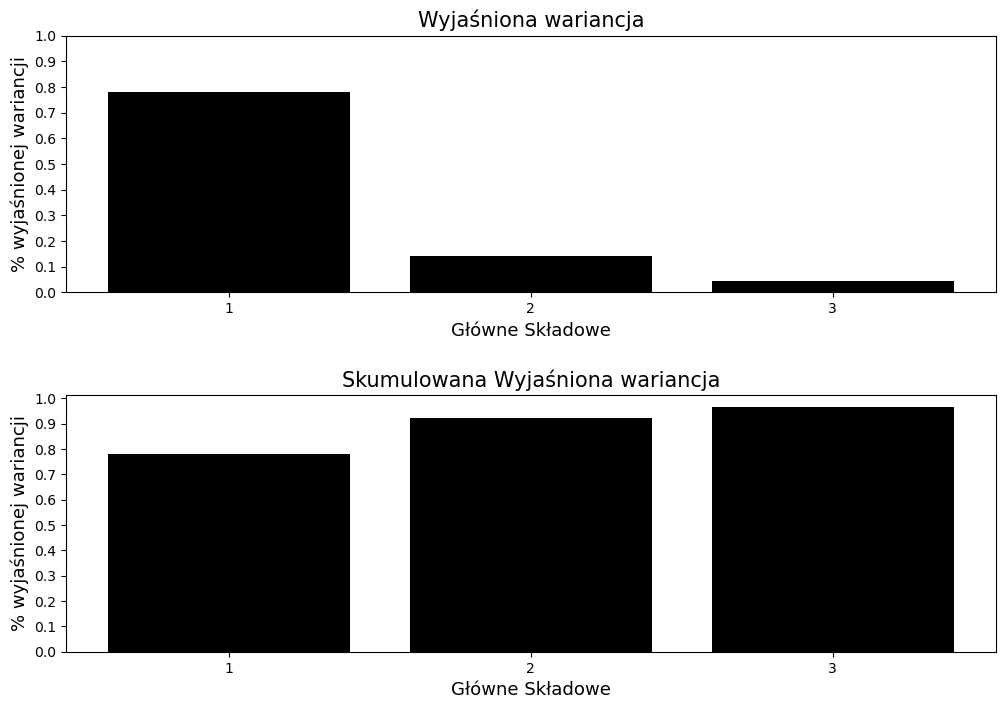

Główna składowa: 1, Wyjaśniona wariancja: 0.77904, Skumulowana Wyjaśniona wariancja: 0.77904
Główna składowa: 2, Wyjaśniona wariancja: 0.14232, Skumulowana Wyjaśniona wariancja: 0.92135
Główna składowa: 3, Wyjaśniona wariancja: 0.04355, Skumulowana Wyjaśniona wariancja: 0.9649


In [29]:
## pobieranie PCA z pipeline
pca = data_preparation_pipeline.named_steps['preprocess'].named_transformers_['num'].named_steps['pca']

## wykresy
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(wspace=.4, hspace=.4)
ax = fig.add_subplot(2, 1, 1)
ax.bar(range(1, 1 + pca.n_components_), pca.explained_variance_ratio_, color='black')
ax.set(xticks=[1, 2, 3])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
ax = fig.add_subplot(2, 1, 2)
ax.bar(range(1, 1 + pca.n_components_), np.cumsum(pca.explained_variance_ratio_), color='black')
ax.set(xticks=[1, 2, 3])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Skumulowana Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
plt.show()

## drukowanie wariancji
principal_component = 1
cum_explained_var = 0
for explained_var in pca.explained_variance_ratio_:
    cum_explained_var += explained_var
    print(f'Główna składowa: {principal_component}, Wyjaśniona wariancja: {np.round(explained_var, 5)}, Skumulowana Wyjaśniona wariancja: {np.round(cum_explained_var, 5)}')
    principal_component += 1

In [30]:
## konwersja do DataFrame z nazwami (sprawdzenie kolejności kolumn pca i onehotencoder)
n_pca = 3  # liczba składowych PCA
n_numeric_passthrough = 7  # X1_LIMIT_BAL, X18–X23

onehot_cols = sum(len(X_train[X].unique()) - 1 for X in categorical_features)  # liczba kolumn po drop='first'

# definicja nazw kolumn
columns = ['PC' + str(i+1) for i in range(n_pca)] + \
          [f'OH_{i}' for i in range(onehot_cols)] + \
          ['X1_LIMIT_BAL', 'X18_PAY_AMT_SEP', 'X19_PAY_AMT_AUG', 'X20_PAY_AMT_JUL',
           'X21_PAY_AMT_JUN', 'X22_PAY_AMT_MAY', 'X23_PAY_AMT_APR']

# konwersja do DataFrame
X_train_df = pd.DataFrame(X_train_prepared, columns=columns)

print(X_train_df.head())

        PC1       PC2       PC3  OH_0  OH_1  OH_2  OH_3  OH_4  OH_5  OH_6  \
0  1.925591 -0.402201 -0.819260   1.0   1.0   0.0   0.0   1.0   0.0   0.0   
1 -0.711377 -0.107593 -0.064078   1.0   0.0   0.0   0.0   1.0   0.0   0.0   
2 -0.553387  1.625488 -0.115759   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
3  2.219001 -0.849000  1.016312   1.0   0.0   0.0   0.0   1.0   0.0   0.0   
4 -0.713857 -0.325394 -0.054013   1.0   0.0   0.0   0.0   1.0   0.0   0.0   

   ...  OH_61  OH_62  OH_63  X1_LIMIT_BAL  X18_PAY_AMT_SEP  X19_PAY_AMT_AUG  \
0  ...    0.0    0.0    0.0     -0.056866         0.580657        -0.290332   
1  ...    0.0    0.0    0.0     -0.134081        -0.344969        -0.290332   
2  ...    0.0    0.0    0.0     -1.215090        -0.348128        -0.227081   
3  ...    0.0    0.0    0.0      0.406423         0.215287         0.154056   
4  ...    0.0    0.0    0.0      1.101358        -0.348251        -0.274236   

   X20_PAY_AMT_JUL  X21_PAY_AMT_JUN  X22_PAY_AMT_MAY  X23_PAY_

     0    1    2
0  1.0  0.0 -0.0
1  0.0  1.0  0.0
2 -0.0  0.0  1.0


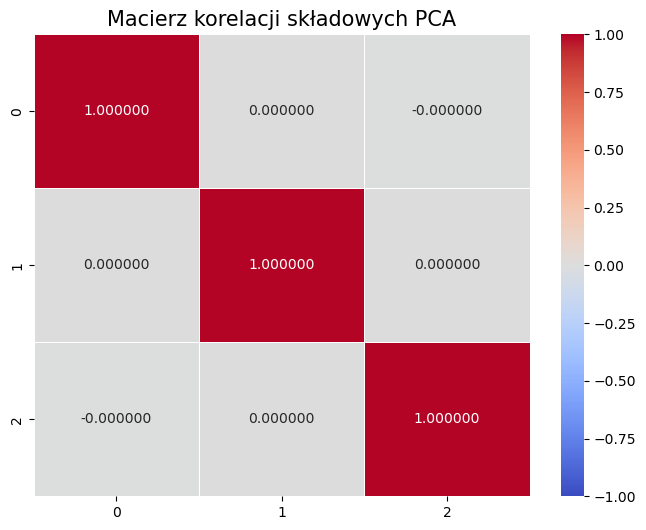

In [31]:
## wyodrębnienie składowych PCA z X_train_prepared
### zakładamy po sprawdzeniu, że pierwsze 3 kolumny to składowe PCA
pca_components = X_train_prepared[:, :pca.n_components_]

## obliczenie korelacji
corr_matrix = pd.DataFrame(pca_components).corr()

## tabelka
print(corr_matrix.round(6))

## heatmapa
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.6f', linewidths=0.5)
plt.title('Macierz korelacji składowych PCA', fontsize=15)
plt.show()

In [32]:
### Feature Engineering dla wybranych cech numerycznych, które wykazywały wieksza korelację (ujemną) z Y_DEFAULT_PAYMENT
class FeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    ## dodajemy __init__ z przełącznikiem 'active'
    def __init__(self, active=True):
        self.active = active
        ## definiujemy nazwy kolumn tutaj, aby mieć do nich dostęp w całej klasie
        self.pay_cols = ['X18_PAY_AMT_SEP', 'X19_PAY_AMT_AUG', 'X20_PAY_AMT_JUL',
                         'X21_PAY_AMT_JUN', 'X22_PAY_AMT_MAY', 'X23_PAY_AMT_APR']
        self.new_features = ['AVG_PAY_AMT', 'STD_PAY_AMT', 'MAX_PAY_AMT', 'LIMIT_BAL_X_AVG_PAY']

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        ## zawsze pracujemy na kopii, aby uniknąć modyfikacji oryginalnych danych
        df_transformed = X.copy()
        
         ## cała logika tworzenia cech jest teraz w bloku 'if' ### jeśli transformator jest aktywny, dodajemy nowe cechy
        if self.active:
            ### agregaty dla X18–X23
            df_transformed['AVG_PAY_AMT'] = df_transformed[self.pay_cols].mean(axis=1)
            df_transformed['STD_PAY_AMT'] = df_transformed[self.pay_cols].std(axis=1).fillna(0) ### dodano .fillna(0) dla stabilności
            df_transformed['MAX_PAY_AMT'] = df_transformed[self.pay_cols].max(axis=1)
            
            ### interakcja z X1_LIMIT_BAL
            df_transformed['LIMIT_BAL_X_AVG_PAY'] = df_transformed['X1_LIMIT_BAL'] * df_transformed['AVG_PAY_AMT']

        ## jeśli 'active' jest False, czyli jest nieaktywny (else), nie robimy nic. Po prostu zwracamy oryginalne dane.
        
        return df_transformed


        
'''

Opcja Feature Engineering może być teraz hiperparametrem danego modelu.
Teraz możesz definiować siatkę hiperparametrów dla GridSearchCV (zamiast zamieniać cały krok, będziesz przełączać jego parametr active).
Przykładowa definicja siatki hiperparametrów, gdzie używamy składni 'nazwa_kroku__parametr':
param_grid = {
    ........ inne hiperparametry
    'feature_engineering__active': [True, False], ### <--- KLUCZOWY PARAMETR
    ........ inne hiperparametry
}

'''


#### definicja nazw dla nowo-utworzonych cech dla przejrzystości
new_engineered_features = [
    'AVG_PAY_AMT',
    'STD_PAY_AMT',
    'MAX_PAY_AMT',
    'LIMIT_BAL_X_AVG_PAY'
]


## aktualizacja steps dla pipeline
steps = [
    ('prepare_column_and_index', PrepareColumnAndIndex(
        index_col='ID',
        new_column_names=new_columns,
        categorical_columns=categorical_columns
    )),
    ('adjust_x3_education_categories', AdjustX3EducationCategories(
        target_column='X3_EDUCATION',
        categories_to_replace=[0, 5, 6],
        replacement_category=4
    )),
    ('adjust_x4_marriage_categories', AdjustX4MarriageCategories(
        marriage_column='X4_MARRIAGE',
        age_column='X5_AGE',
        age_threshold=35
    )),
    ## ten krok dodaje 4 nowe, nieprzeskalowane kolumny (NAJPIERW tworzymy nowe cechy na DataFrame)
    ('feature_engineering', FeatureEngineeringTransformer()),
    ## teraz dopiero przetwarzamy wszystkie kolumny (stare, nowe i kategoryczne)
    ('preprocess', ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=3)),  # PCA tylko dla num_features_for_pca
                ('scaler_2', StandardScaler())
            ]), ['X12_BILL_AMT_SEP', 'X13_BILL_AMT_AUG', 'X14_BILL_AMT_JUL',
                 'X15_BILL_AMT_JUN', 'X16_BILL_AMT_MAY', 'X17_BILL_AMT_APR', 'X5_AGE']),

            ### transformator dla cech kategorycznych
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
        ],
        ### zamiast ignorować resztę, skalujemy ją (czyli wszystkie inne cechy numeryczne: oryginalne, z feature engineering)
        ### zostaną automatycznie przechwycone i przeskalowane tutaj
        remainder=StandardScaler() ## <--- zamiast 'passthrough'
    ))
]


data_preparation_pipeline = Pipeline(steps=steps)


X_train_prepared = data_preparation_pipeline.fit(X_train, y_train).transform(X_train)
X_test_prepared = data_preparation_pipeline.transform(X_test)


print("Kształt danych po feature engineering:", X_train_prepared.shape)

Kształt danych po feature engineering: (24000, 78)


               Feature  Point-Biserial Correlation
0          AVG_PAY_AMT                     -0.1019
1          STD_PAY_AMT                     -0.0718
2          MAX_PAY_AMT                     -0.0806
3  LIMIT_BAL_X_AVG_PAY                     -0.0856


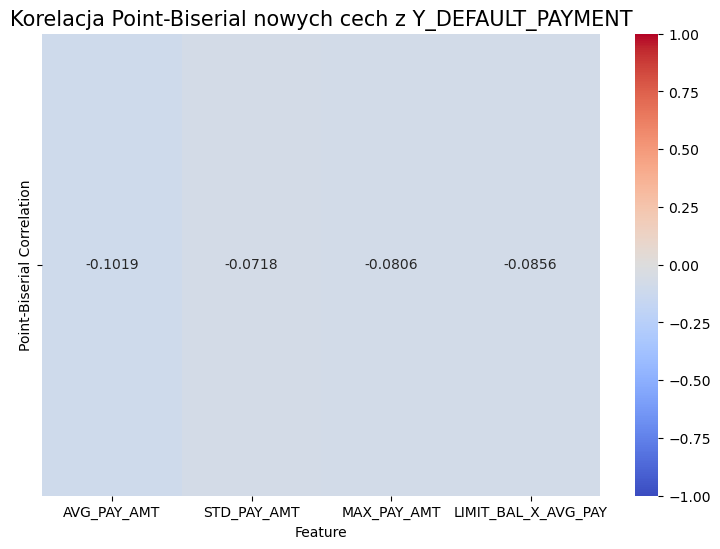

In [33]:
## pobranie danych i indeksów 4 nowych cech (po feature_engineering)
n_pca = 3
n_onehot = sum(len(X_train[X].unique()) - 1 for X in categorical_features)  ### liczba kolumn one-hot
n_numeric_passthrough = 7 + len(new_engineered_features)  ### 7 starych + 4 nowe
new_feature_indices = list(range(X_train_prepared.shape[1] - len(new_engineered_features), X_train_prepared.shape[1]))

## wyodrębnienie nowych cech i Y
new_features = X_train_prepared[:, new_feature_indices]
y_train_array = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else y_train

## obliczanie point-biserial correlation 4 nowych cech numerycznych (po feature_engineering) z Y
correlations = [pointbiserialr(new_features[:, i], y_train_array)[0] for i in range(len(new_engineered_features))]
corr_df = pd.DataFrame({'Feature': new_engineered_features, 'Point-Biserial Correlation': correlations})
print(corr_df.round(4))

## heatmapa (dla wizualizacji)
plt.figure(figsize=(9, 6))
sns.heatmap(corr_df.set_index('Feature')['Point-Biserial Correlation'].to_frame().T, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.4f')
plt.title('Korelacja Point-Biserial nowych cech z Y_DEFAULT_PAYMENT', fontsize=15)
plt.show()

Rozkład y_train: Y_DEFAULT_PAYMENT
0    18691
1     5309
Name: count, dtype: int64


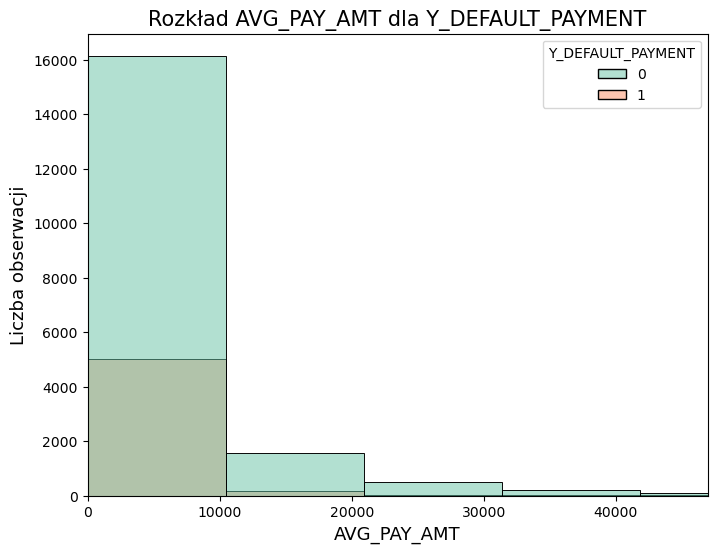

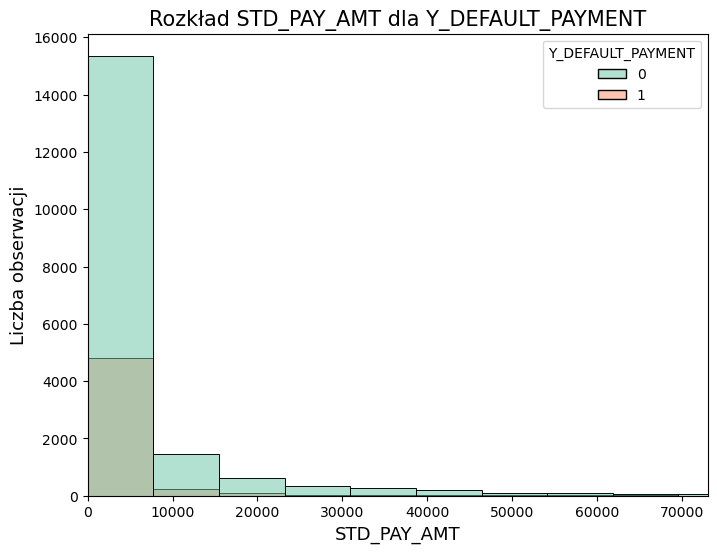

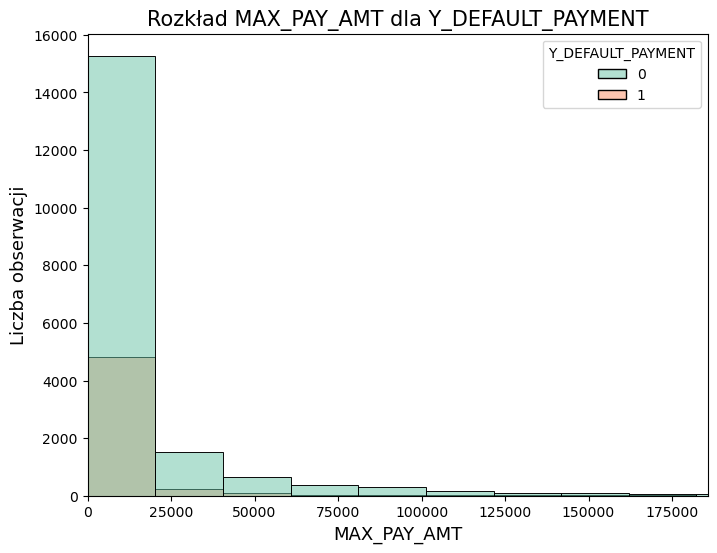

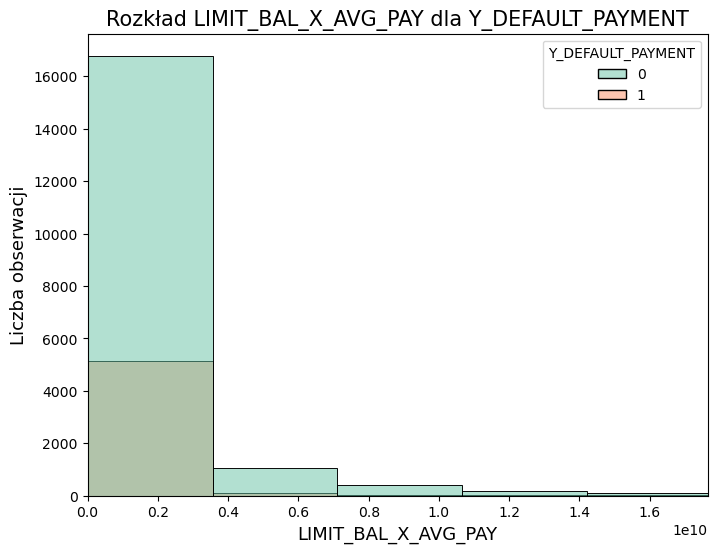

In [34]:
print("Rozkład y_train:", y_train.value_counts())

## ponowne tworzenie DataFrame z oryginalnymi danymi i nowymi cechami
X_train_orig = X_train.copy()
X_train_orig = data_preparation_pipeline.named_steps['feature_engineering'].transform(X_train_orig)

## histogramy dla 4 nowych cech (originalne wartości przed znormalizowaniem) z podziałem na Y_DEFAULT_PAYMENT
for feature in new_engineered_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=X_train_orig, x=feature, hue=y_train, bins=60, palette='Set2')
    #### ustawienie limitu X na 99. percentyl + mały naddatek
    upper_limit = X_train_orig[feature].quantile(0.99) * 1.05  # 99% percentyl + 5% naddatku
    plt.xlim(0, upper_limit)
    plt.title(f'Rozkład {feature} dla Y_DEFAULT_PAYMENT', fontsize=15)
    plt.xlabel(feature, fontsize=13)
    plt.ylabel('Liczba obserwacji', fontsize=13)
    plt.show()

In [35]:
### adding PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures

### musimy wiedzieć, jakie nazwy kolumn wychodzą z kroku polynomial_features
class ColumnTransformerWithNames(BaseEstimator, TransformerMixin):
    def __init__(self, column_transformer):
        self.column_transformer = column_transformer

    def fit(self, X, y=None):
        ## dopasowujemy wewnętrzny ColumnTransformer
        self.column_transformer.fit(X, y)
        return self

    def transform(self, X, y=None):
        # 1. Wykonujemy transformację, która zwraca tablicę NumPy
        data_numpy = self.column_transformer.transform(X)
        
        # 2. Pobieramy nazwy kolumn z dopasowanego transformatora
        try:
            # próba pobrania nazw cech - działa dla większości transformerów
            column_names = self.column_transformer.get_feature_names_out()
        except Exception:
            # fallback dla transformerów, które nie mają tej metody
            column_names = [f"col_{i}" for i in range(data_numpy.shape[1])]
        
        # 3. Tworzymy i zwracamy DataFrame, zachowując indeks
        return pd.DataFrame(data_numpy, columns=column_names, index=X.index)



## definiuj ColumnTransformer jak zwykle ale nie rób na nim .fit
poly_transformer_config = ColumnTransformer(
    transformers=[
        ('poly', PolynomialFeatures(degree=2, include_bias=False), ['X1_LIMIT_BAL', 'X18_PAY_AMT_SEP'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)



## aktualizacja steps dla pipeline

steps = [
    ('prepare_column_and_index', PrepareColumnAndIndex(
        index_col='ID',
        new_column_names=new_columns,
        categorical_columns=categorical_columns
    )),
    ('adjust_x3_education_categories', AdjustX3EducationCategories(
        target_column='X3_EDUCATION',
        categories_to_replace=[0, 5, 6],
        replacement_category=4
    )),
    ('adjust_x4_marriage_categories', AdjustX4MarriageCategories(
        marriage_column='X4_MARRIAGE',
        age_column='X5_AGE',
        age_threshold=35
    )),

    ('polynomial_features_with_names', ColumnTransformerWithNames(poly_transformer_config)),
    ## nastepny krok teraz zawsze otrzyma DataFrame, niezależnie od ustawień GridSearchCV
    
    
    ## ten krok dodaje 4 nowe, nieprzeskalowane kolumny (NAJPIERW tworzymy nowe cechy na DataFrame)
    ('feature_engineering', FeatureEngineeringTransformer()),
    ## teraz dopiero przetwarzamy wszystkie kolumny (stare, nowe i kategoryczne)
    ('preprocess', ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=3)),  # PCA tylko dla num_features_for_pca
                ('scaler_2', StandardScaler())
            ]), ['X12_BILL_AMT_SEP', 'X13_BILL_AMT_AUG', 'X14_BILL_AMT_JUL',
                 'X15_BILL_AMT_JUN', 'X16_BILL_AMT_MAY', 'X17_BILL_AMT_APR', 'X5_AGE']),

            ### transformator dla cech kategorycznych
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
        ],
        ### zamiast ignorować resztę, skalujemy ją (czyli wszystkie inne cechy numeryczne: oryginalne, z feature engineering i wielomianowe)
        ### zostaną automatycznie przechwycone i przeskalowane tutaj
        remainder=StandardScaler() ## <--- zamiast 'passthrough'
    ))
]



'''

Opcja PolynomialFeatures może być teraz hiperparametrem danego modelu, możesz używać w GridSearchCV.
Teraz możesz definiować siatkę hiperparametrów dla GridSearchCV, ale zwróć uwagę na składnię dostępu do parametru 'degree':
param_grid = {
    ... inne hiperparametry
    'polynomial_features_with_names__poly__degree': [1, 2, 3],   ## -->   testuje degree=1 (czyli brak wielomianów) i 2, 3 itd
    ... inne hiperparametry
}

'''



data_preparation_pipeline = Pipeline(steps=steps)


X_train_prepared = data_preparation_pipeline.fit(X_train, y_train).transform(X_train)
X_test_prepared = data_preparation_pipeline.transform(X_test)


print("Kształt danych po polynomial features i feature engineering:", X_train_prepared.shape)

Kształt danych po polynomial features i feature engineering: (24000, 81)


poly_feature_names: ['X1_LIMIT_BAL^2', 'X1_LIMIT_BAL X18_PAY_AMT_SEP', 'X18_PAY_AMT_SEP^2']
                        Feature  Point-Biserial Correlation
0                X1_LIMIT_BAL^2                     -0.0553
1  X1_LIMIT_BAL X18_PAY_AMT_SEP                     -0.0526
2             X18_PAY_AMT_SEP^2                     -0.0533


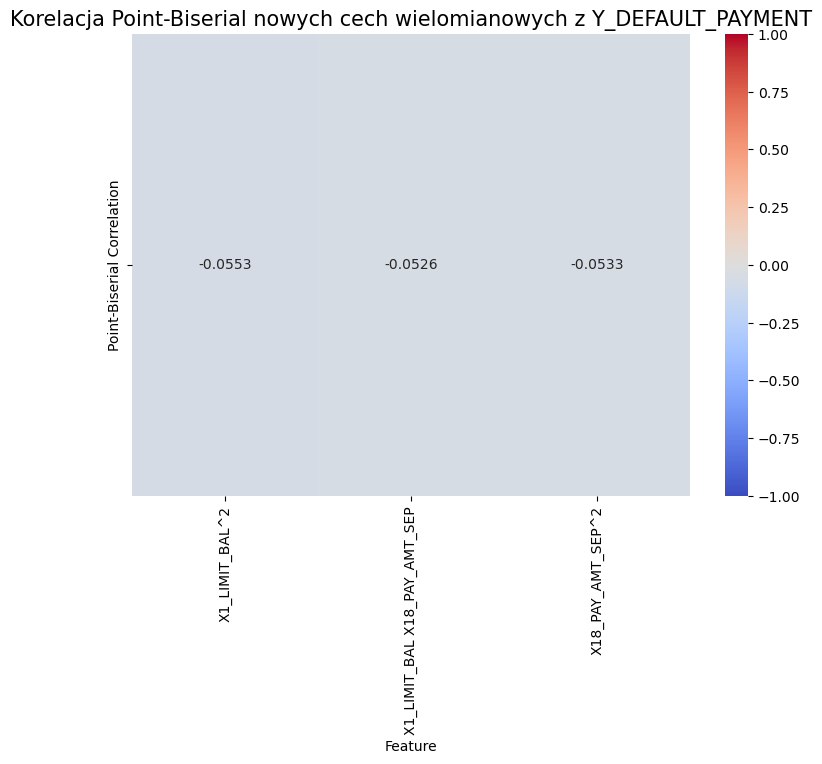

In [36]:
## pobranie tylko nazw cech wielomianowych – ręczne podanie
poly_feature_names = ['X1_LIMIT_BAL^2', 'X1_LIMIT_BAL X18_PAY_AMT_SEP', 'X18_PAY_AMT_SEP^2']
print("poly_feature_names:", poly_feature_names)  ### powinno zwrócić 3 nazwy

## obliczenie indeksów cech wielomianowych w X_train_prepared
n_pca = 3
n_onehot = sum(len(X_train[X].unique()) - 1 for X in categorical_features)  ## liczba kolumn OneHot (~64)
n_original = 7  ### liczba oryginalnych kolumn w remainder (X1_LIMIT_BAL, X18–X23)
poly_indices = list(range(n_pca + n_onehot + n_original, n_pca + n_onehot + n_original + len(poly_feature_names)))  ## 74–76

## wyodrębnienie nowych cech wielomianowych i Y
poly_features = X_train_prepared[:, poly_indices]
y_train_array = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else y_train

## obliczenie point-biserial correlation dla 3 cech wielomianowych
correlations = [pointbiserialr(poly_features[:, i], y_train_array)[0] for i in range(len(poly_feature_names))]
corr_df = pd.DataFrame({'Feature': poly_feature_names, 'Point-Biserial Correlation': correlations})
print(corr_df.round(4))

## heatmapa
plt.figure(figsize=(9, 6))
sns.heatmap(corr_df.set_index('Feature')['Point-Biserial Correlation'].to_frame().T, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.4f')
plt.title('Korelacja Point-Biserial nowych cech wielomianowych z Y_DEFAULT_PAYMENT', fontsize=15)
plt.show()

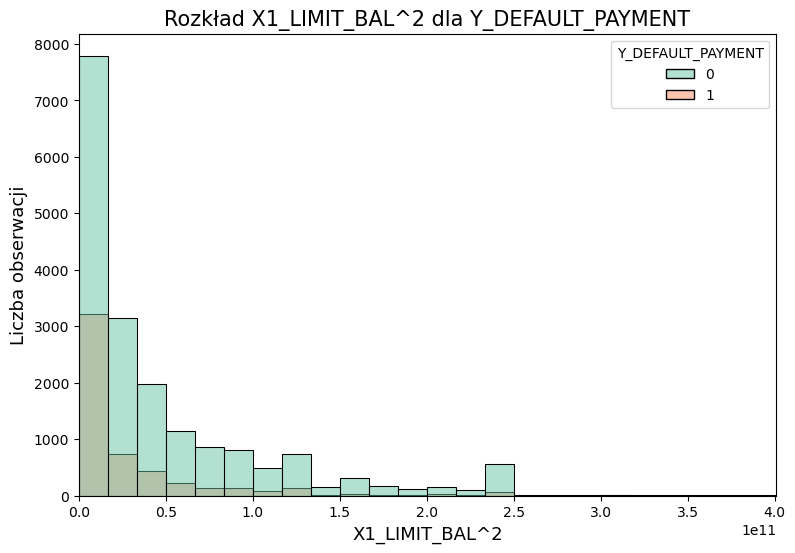

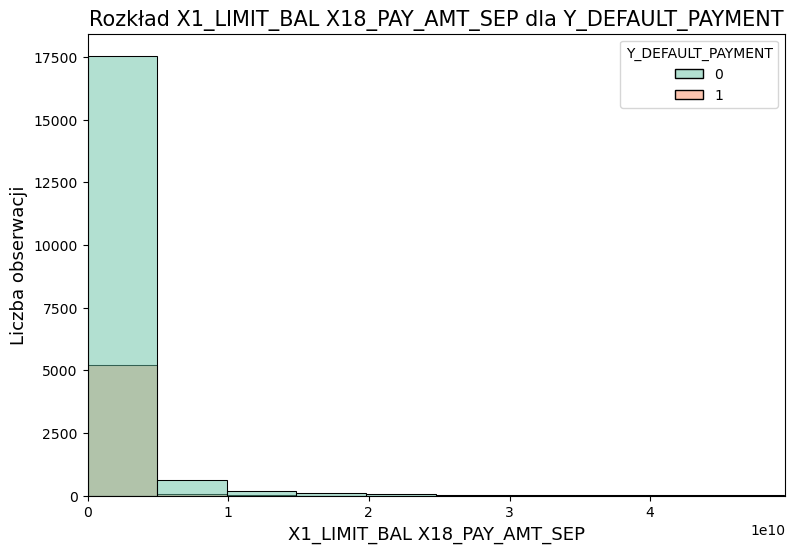

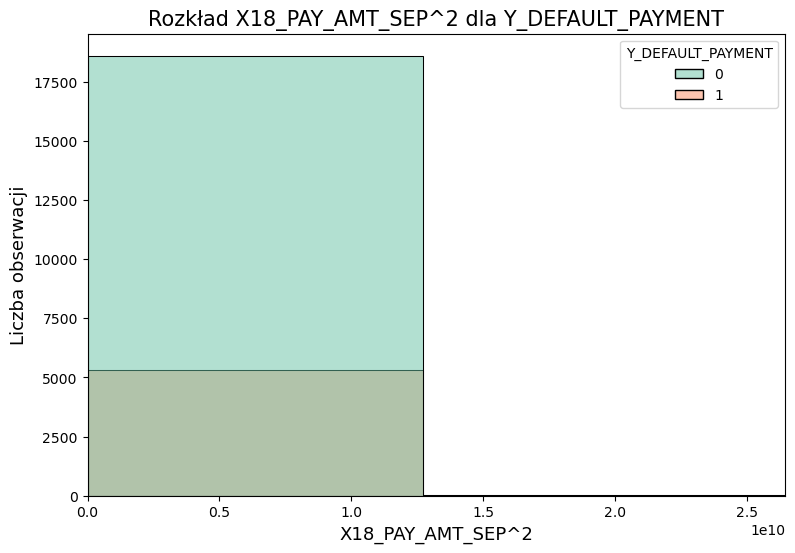

In [37]:
## ponowne tworzenie DataFrame z oryginalnymi danymi i nowymi cechami (nieprzeskalowanymi wartościami cech wielomianowych)
X_train_orig = X_train.copy()
X_train_orig = data_preparation_pipeline.named_steps['polynomial_features_with_names'].transform(X_train_orig)

## histogramy dla 3 nowych cech wielomianowych (originalne wartości przed znormalizowaniem) z podziałem na Y_DEFAULT_PAYMENT
for feature in poly_feature_names:
    plt.figure(figsize=(9, 6))
    sns.histplot(data=X_train_orig, x=feature, hue=y_train, bins=60, palette='Set2')
    #### ustawienie limitu X na 99. percentyl + mały naddatek
    upper_limit = X_train_orig[feature].quantile(0.998) * 1.01  # 99,8% percentyl + 1% naddatku
    plt.xlim(0, upper_limit)
    plt.title(f'Rozkład {feature} dla Y_DEFAULT_PAYMENT', fontsize=15)
    plt.xlabel(feature, fontsize=13)
    plt.ylabel('Liczba obserwacji', fontsize=13)
    plt.show()

In [38]:
## adding transformer do selekcji cech (z funckją "on/off")

from sklearn.ensemble import RandomForestClassifier

class SelectFromModelTransformer(BaseEstimator, TransformerMixin):
    """
    Transformer do selekcji cech na podstawie ich ważności (feature importances)
    zwracanej przez podany model (estymator).
    """
    def __init__(self, estimator, threshold=0.005, active=True):
        self.estimator = estimator
        self.threshold = threshold
        self.active = active ## przełącznik do aktywacji/dezaktywacji w GridSearchCV

    def fit(self, X, y=None):
        ### jeśli transformer jest nieaktywny, nic nie robi
        if not self.active:
            return self

        ### w przeciwnym razie, trenuje model i znajduje ważne cechy
        self.estimator.fit(X, y)
        importances = self.estimator.feature_importances_
        self.selected_indices_ = [i for i, imp in enumerate(importances) if imp > self.threshold]
        
        ### zabezpieczenie na wypadek, gdyby żadna cecha nie spełniła progu
        if len(self.selected_indices_) == 0:
            print("Ostrzeżenie: Żadna cecha nie przekroczyła progu. Wybieram jedną, najważniejszą cechę.")
            self.selected_indices_ = [importances.argmax()]
            
        return self

    def transform(self, X, y=None):
        ### jeśli transformer jest nieaktywny, zwróć dane bez zmian
        if not self.active:
            return X
            
        ### w przeciwnym razie, zwróć tylko wyselekcjonowane kolumny
        return X[:, self.selected_indices_]




## aktualizacja steps dla pipeline (+ selekcja caech)

steps = [
    ('prepare_column_and_index', PrepareColumnAndIndex(
        index_col='ID',
        new_column_names=new_columns,
        categorical_columns=categorical_columns
    )),
    ('adjust_x3_education_categories', AdjustX3EducationCategories(
        target_column='X3_EDUCATION',
        categories_to_replace=[0, 5, 6],
        replacement_category=4
    )),
    ('adjust_x4_marriage_categories', AdjustX4MarriageCategories(
        marriage_column='X4_MARRIAGE',
        age_column='X5_AGE',
        age_threshold=35
    )),

    ('polynomial_features_with_names', ColumnTransformerWithNames(poly_transformer_config)),
    ## nastepny krok teraz zawsze otrzyma DataFrame, niezależnie od ustawień GridSearchCV
    
    
    ## ten krok dodaje 4 nowe, nieprzeskalowane kolumny (NAJPIERW tworzymy nowe cechy na DataFrame)
    ('feature_engineering', FeatureEngineeringTransformer()),
    ## teraz dopiero przetwarzamy wszystkie kolumny (stare, nowe i kategoryczne)
    ('preprocess', ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=3)),  # PCA tylko dla num_features_for_pca
                ('scaler_2', StandardScaler())
            ]), ['X12_BILL_AMT_SEP', 'X13_BILL_AMT_AUG', 'X14_BILL_AMT_JUL',
                 'X15_BILL_AMT_JUN', 'X16_BILL_AMT_MAY', 'X17_BILL_AMT_APR', 'X5_AGE']),

            ### transformator dla cech kategorycznych
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
        ],
        ### zamiast ignorować resztę, skalujemy ją (czyli wszystkie inne cechy numeryczne: oryginalne, z feature engineering i wielomianowe)
        ### zostaną automatycznie przechwycone i przeskalowane tutaj
        remainder=StandardScaler() ## <--- zamiast 'passthrough'
    )),
    ## selekcja cech
    ('feature_selection', SelectFromModelTransformer(
        estimator=RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    ))
]



'''

Opcja włączenia SelectFromModelTransformer może być teraz hiperparametrem danego modelu.
Teraz możesz definiować siatkę hiperparametrów dla GridSearchCV (zamiast zamieniać cały krok, będziesz przełączać jego parametr active).
Możesz też testować jaki próg ważności jest najlepszy.
Przykładowa definicja dla siatki hiperparametrów, gdzie używamy składni 'nazwa_kroku__parametr':
param_grid = {
    ........ inne hiperparametry
    'feature_selection__active': [True, False], ## test z selekcją i bez
    'feature_selection__threshold': [0.005, 0.0075, 0.01], ## test różnych progów ważności
    ........ inne hiperparametry
}

'''



data_preparation_pipeline = Pipeline(steps=steps)


X_train_prepared = data_preparation_pipeline.fit(X_train, y_train).transform(X_train)
X_test_prepared = data_preparation_pipeline.transform(X_test)


print(f'Kształt danych po selekcji cech: {X_train_prepared.shape}')
print(X_train_prepared.dtype)

Kształt danych po selekcji cech: (24000, 31)
float64


In [39]:
### adding decision boundary visualisation function

from sklearn.decomposition import PCA
from numpy import where, arange, meshgrid, hstack

def visualize_decision_boundary(X_data, y_data, trained_classifier, title="Granica decyzyjna modelu"):
    """
    Wizualizuje granicę decyzyjną klasyfikatora po zredukowaniu danych do 2 wymiarów za pomocą PCA.

    Argumenty:
    - X_data: Oryginalne, przetworzone dane (np. X_train_prepared).
    - y_data: Etykiety (np. y_train lub y_test).
    - trained_classifier: Model, którego typ chcemy zwizualizować (np. LogisticRegression itd.).
    - title: Tytuł wykresu.
    """
    ## 1. Redukcja wymiarów danych do 2D w celu wizualizacji
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_data)

    ## 2. Trenowanie nowego, prostego modelu na danych 2D
    ####  -->  używamy tego samego typu klasyfikatora, co w głównym pipeline
    model_2d = type(trained_classifier)()
    model_2d.fit(X_pca, y_data)

    ## 3. Tworzenie siatki do rysowania granicy decyzyjnej
    min1, max1 = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    min2, max2 = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)
    xx, yy = meshgrid(x1grid, x2grid)
    grid = hstack((xx.flatten().reshape(-1,1), yy.flatten().reshape(-1,1)))

    ## 4. Predykcja dla każdego punktu siatki i rysowanie tła
    yhat = model_2d.predict(grid)
    zz = yhat.reshape(xx.shape)
    
    plt.figure(figsize=(12, 7))
    plt.contourf(xx, yy, zz, cmap='RdYlBu', alpha=0.3)

    ## 5. Rysowanie punktów danych (obserwacji) na tle granicy
    ##### definiujemy kolory jawnie, aby mieć pełną kontrolę
    colors = ['#4477AA', '#CC6677'] #### niebieski dla 0, czerwony dla 1
    
    for class_value in [0, 1]:
        row_ix = where(y_data.to_numpy() == class_value)
        plt.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1], 
                    color=colors[class_value],
                    label=f'Klasa {class_value}', 
                    alpha=0.7)

    plt.title(title, fontsize=15)
    plt.xlabel("Główna składowa 1 (PC1)", fontsize=12)
    plt.ylabel("Główna składowa 2 (PC2)", fontsize=12)
    plt.legend()
    plt.show()


In [40]:
### klasa z funkcjami do ewaluacji modeli i kalkulacji / porównania metryk
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score


class ModelEvaluator:
    """
    Klasa do kompleksowej oceny i wizualizacji modeli klasyfikacyjnych.
    Przechowuje wyniki dla wielu modeli i pozwala na ich porównanie.
    """
    def __init__(self):
        self.results = {}
        self.metrics_summary = pd.DataFrame(columns=['Model', 'F1_score', 'AUC'])

    def evaluate(self, pipeline, model_name, X_train, y_train, X_test, y_test):
        """
        Trenuje pipeline, ocenia model i generuje raport z metrykami i wizualizacjami.
        """
        print(f"{'='*30}\nOcena modelu: {model_name}\n{'='*30}")

        ## 1. Trenowanie pełnego pipeline'u
        pipeline.fit(X_train, y_train)

        ## 2. Predykcje na zbiorze testowym
        predictions = pipeline.predict(X_test)
        predictions_proba = pipeline.predict_proba(X_test)[:, 1]

        ## 3. Zapisanie wyników do późniejszego porównania
        self.results[model_name] = {
            'pipeline': pipeline,
            'proba': predictions_proba
        }
        
        #### --- METRYKI I WIZUALIZACJE --- ####

        ## Raport klasyfikacji i macierz omyłek
        print("--- Raport Klasyfikacji ---")
        print(classification_report(y_test, predictions))
        
        print("--- Macierz Omyłek ---")
        cm = confusion_matrix(y_test, predictions)
        plt.figure()
        ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
        ax.set_title(f'Macierz Omyłek dla: {model_name}\n')
        ax.set_xlabel('\nPredykcja')
        ax.set_ylabel('Rzeczywista wartość')
        plt.show()

        ## Obliczenie metryk i dodanie ich do podsumowania
        f1 = f1_score(y_test, predictions)
        auc = roc_auc_score(y_test, predictions_proba)
        new_row = pd.DataFrame([{'Model': model_name, 'F1_score': f1, 'AUC': auc}])
        self.metrics_summary = pd.concat([self.metrics_summary, new_row], ignore_index=True)

        ### --- WIZUALIZACJE GRANIC DECYZYJNYCH --- ###
        
        ## Przygotowanie danych do wizualizacji (bez kroku klasyfikatora)
        preprocessor_pipeline = Pipeline(pipeline.steps[:-1])
        X_train_prepared = preprocessor_pipeline.transform(X_train)
        X_test_prepared = preprocessor_pipeline.transform(X_test)
        classifier = pipeline.named_steps['classifier']
        
        print("\n--- Wizualizacje Granic Decyzyjnych ---")
        visualize_decision_boundary(X_train_prepared, y_train, classifier,
                                    title=f"Granica decyzyjna (dane treningowe) - {model_name}")
        
        visualize_decision_boundary(X_test_prepared, y_test, classifier,
                                    title=f"Granica decyzyjna vs. Rzeczywiste klasy (dane testowe) - {model_name}")
        
        visualize_decision_boundary(X_test_prepared, pd.Series(predictions), classifier,
                                    title=f"Granica decyzyjna vs. Predykcje (dane testowe) - {model_name}")

    def plot_roc_curves(self, y_test):
        """
        Rysuje krzywe ROC dla wszystkich ocenionych modeli na jednym wykresie.
        """
        if not self.results:
            print("Brak ocenionych modeli do narysowania krzywej ROC.")
            return

        print(f"\n{'='*30}\nPorównanie modeli - Krzywa ROC\n{'='*30}")
        plt.figure(figsize=(10, 8))
        plt.plot([0, 1], [0, 1], 'k--', label='Model losowy')

        for model_name, result in self.results.items():
            fpr, tpr, _ = roc_curve(y_test, result['proba'])
            auc = roc_auc_score(y_test, result['proba'])
            label = f"{model_name} (AUC = {auc:.3f})"
            plt.plot(fpr, tpr, label=label)

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Porównawcza Krzywa ROC')
        plt.legend(loc='lower right')
        plt.show()


In [ ]:
### Model logistic_regression

import mlflow
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


## check and set tracking URI
print("Current tracking URI:", mlflow.get_tracking_uri())
mlflow.set_tracking_uri("file:./mlruns")


mlflow.autolog() ### <- właczamy proces autologowania


# rozpoczęcie nowego eksperymentu
mlflow.set_experiment("Credit Cards") #### <---- move this before logging dataset to ensure the experiment is initialized


## zdefiniowanie pipeline (zawsze z krokiem 'classifier' na końcu)
# tutaj model Logistic Regression
pipeline_lr_steps = steps + [('classifier', LogisticRegression(random_state=42, max_iter=1000, solver='saga', n_jobs=-1))]
pipeline_lr = Pipeline(pipeline_lr_steps)


# logujemy info o użytych datasetach
mlflow_dataset = mlflow.data.from_pandas(dataframe, targets = "default payment next month",
                                  name = "Credit cards Dataset")
mlflow.log_input(mlflow_dataset, context = "training")



# siatka hiperparametrów dla Logistic Regression
params_lr = [
    ### siatka dla solvera 'saga', który obsługuje wszystko
    {
        'classifier__solver': ['saga'],
        'classifier__penalty': ['l1', 'l2', 'none'],
        'classifier__C': [0.01, 0.1, 1, 10],  #### można rozszerzyć do 'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
        'feature_selection__active': [True, False],
        'polynomial_features_with_names__column_transformer__poly__degree': [1, 2],
        'feature_engineering__active': [True, False],
        'preprocess__num__pca__n_components': [3, 5]
    },
    {
        'classifier__solver': ['saga'],
        'classifier__penalty': ['elasticnet'],
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__l1_ratio': [0.2, 0.5, 0.8],
        'feature_selection__active': [True, False],
        'polynomial_features_with_names__column_transformer__poly__degree': [1, 2],
        'feature_engineering__active': [True, False],
        'preprocess__num__pca__n_components': [3, 5]
    },
    ### siatka dla solvera 'liblinear', który obsługuje l1 i l2
    {
        'classifier__solver': ['liblinear'],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': [0.01, 0.1, 1, 10],
        'feature_selection__active': [True, False],
        'polynomial_features_with_names__column_transformer__poly__degree': [1, 2],
        'feature_engineering__active': [True, False],
        'preprocess__num__pca__n_components': [3, 5]
    },
    ### siatka dla 'lbfgs' - obsługuje 'l2' i 'none'
    {
        'classifier__solver': ['lbfgs'],
        'classifier__penalty': ['l2', 'none'],
        'classifier__C': [0.01, 0.1, 1, 10],
        'feature_selection__active': [True, False],
        'polynomial_features_with_names__column_transformer__poly__degree': [1, 2],
        'feature_engineering__active': [True, False],
        'preprocess__num__pca__n_components': [3, 5]
    }
]



# Grid Search CV
lr_gridsearch = GridSearchCV(
    pipeline_lr,
    params_lr,
    scoring='f1_macro',
    cv=5,
    verbose=10,
    n_jobs=-1
)

# Trenowanie modelu na danych treningowych
lr_gridsearch.fit(X_train, y_train)

# Wyświetlenie najlepszych hiperparametrów
print('\nBest hyperparameters:', lr_gridsearch.best_params_)

# Zapisanie najlepszego modelu
lr_model = lr_gridsearch.best_estimator_


## stwórz instancję nowej klasy ModelEvaluator()
evaluator = ModelEvaluator()


## uruchom pełną ocenę modelu
evaluator.evaluate(lr_model, 'Logistic Regression - best estimator', X_train, y_train, X_test, y_test)

## wyświetl krzywą ROC i tabelę z metrykami
evaluator.plot_roc_curves(y_test)

print("\n--- Podsumowanie Metryk ---")
display(evaluator.metrics_summary.sort_values(by='AUC', ascending=False))

2025/07/18 22:31:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/07/18 22:31:40 WARNING mlflow.utils.autologging_utils: MLflow statsmodels autologging is known to be compatible with 0.12.2 <= statsmodels <= 0.14.4, but the installed version is 0.14.5. If you encounter errors during autologging, try upgrading / downgrading statsmodels to a compatible version, or try upgrading MLflow.
2025/07/18 22:31:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


Current tracking URI: file:///O:/Projects/credit_cards/mlruns


2025/07/18 22:31:40 INFO mlflow.tracking.fluent: Experiment with name 'Credit Cards' does not exist. Creating a new experiment.


Fitting 5 folds for each of 640 candidates, totalling 3200 fits
